<h1 style="color:red;font-size:46px;text-align:center;">Klinikbewertungen.de<h1/>

<h1 align=center><font size = 6, color = blue>Exploratory Data Analysis-2</font></h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("klinik_bewertungen_afterAnalysis.csv")
df.head()

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.0,2021,6,7,100.0,100.0,100.0,100.0,100.0,1
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.0,2021,5,25,100.0,100.0,100.0,100.0,67.0,1
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.0,2021,5,11,100.0,100.0,100.0,100.0,100.0,1
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.0,2021,5,9,100.0,100.0,100.0,67.0,100.0,1
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.0,2021,5,7,100.0,100.0,100.0,100.0,67.0,1


In [224]:
df[["Name der Klinik","Fachbereich","Erfahrungsbericht"]].describe(include=['object'])

,Name der Klinik,Fachbereich,Erfahrungsbericht
count,2058,2058,2058
unique,17,35,2058
top,DIAKOVERE Henriettenstift,Orthopädie,Nach Prostata-Radikal-OP und 10jährigem mühsam...
freq,241,269,1


<h2 id="basic_grouping">Grouping by Klinik</h2>

In [14]:
df_kliniks_mean=df.groupby(['Name der Klinik'],as_index=False).mean()
df_kliniks_mean=df_kliniks_mean[['Name der Klinik','Polaritiy','Gesamt','positive']]
df_kliniks_mean

,Name der Klinik,Polaritiy,Gesamt,positive
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,0.622093
1,AMEOS Klinikum Seepark Geestland,0.274780,70.861111,0.854167
2,DIAKOVERE Henriettenstift,0.235991,60.165975,0.742739
3,Eilenriede Klinik Hannover,0.449850,84.367347,0.897959
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,0.747967
5,Helios Kliniken Mittelweser,0.256709,54.572581,0.814516
6,Herzogin Elisabeth Hospital,0.371762,79.179688,0.875000
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,0.694915
8,Klinik am Zuckerberg,0.472796,91.350649,0.922078
9,Klinikum Peine,0.275747,62.317241,0.751724


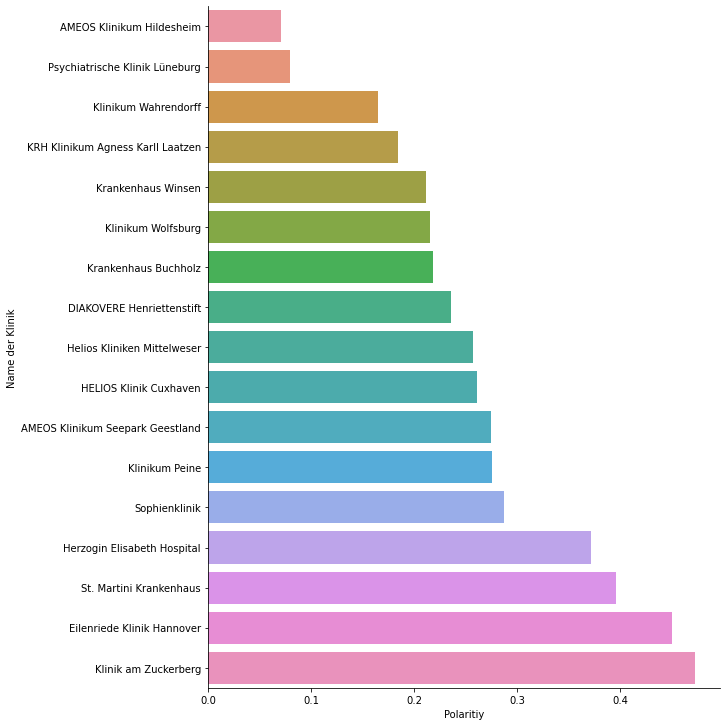

In [90]:
df_kliniks_mean=df_kliniks_mean.sort_values('Polaritiy')
sns.catplot(x="Polaritiy",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)

In [91]:
df_kliniks_mean[["Polaritiy","Gesamt"]].corr()

,Polaritiy,Gesamt
Polaritiy,1.000000,0.962027
Gesamt,0.962027,1.000000


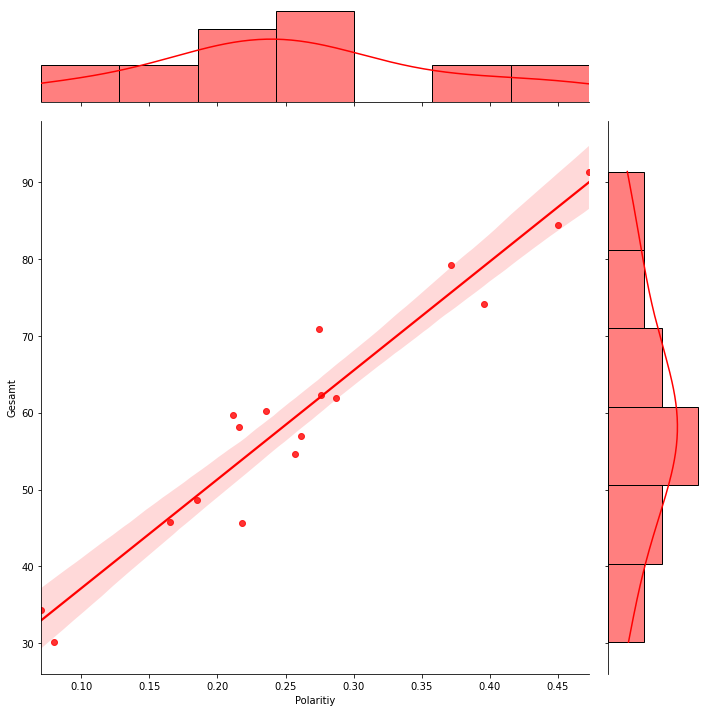

In [28]:
sns.jointplot(x=df_kliniks_mean["Polaritiy"],y=df_kliniks_mean["Gesamt"],data=df_kliniks_mean,kind="reg",color="r",height=10)

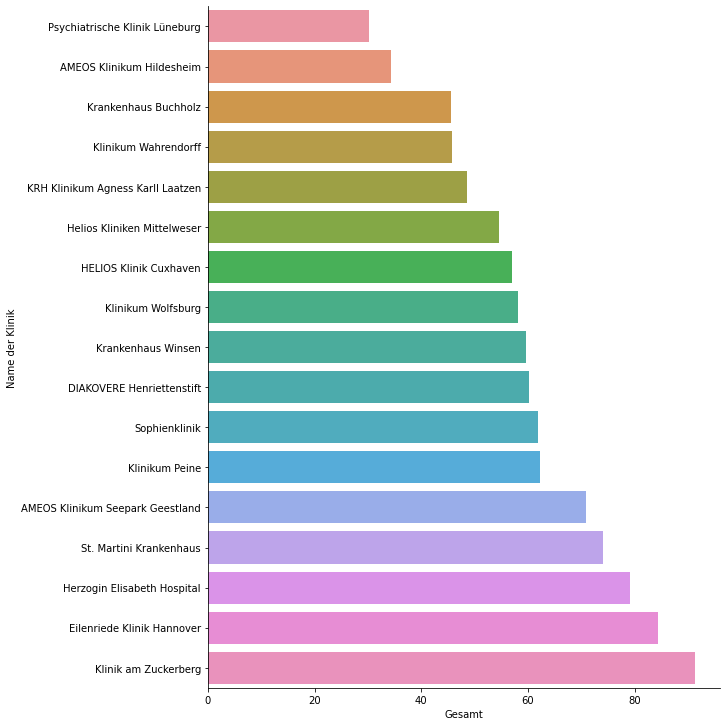

In [89]:
df_kliniks_mean=df_kliniks_mean.sort_values('Gesamt')
sns.catplot(x="Gesamt",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)

<h2 id="basic_grouping">Grouping by Fachbereich</h2>

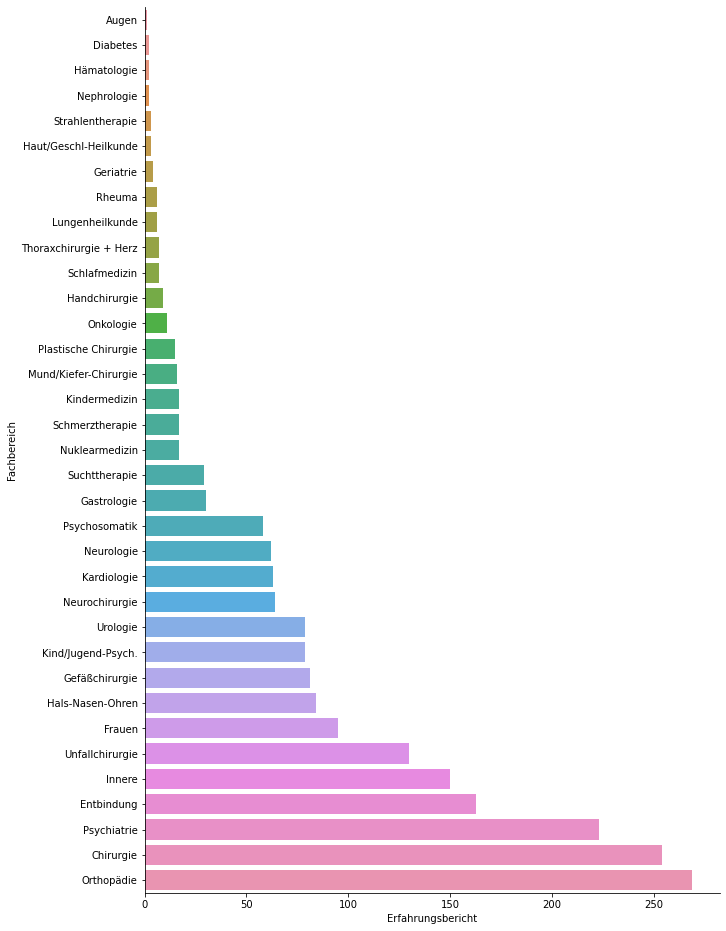

In [78]:
df_fachbereich_count=df.groupby(['Fachbereich'],as_index=False).count()
df_fachbereich_count=df_fachbereich_count[['Fachbereich','Erfahrungsbericht']]
df_fachbereich_count=df_fachbereich_count.sort_values('Erfahrungsbericht')
#df_fachbereich_count
g=sns.catplot(x="Erfahrungsbericht",y="Fachbereich",data=df_fachbereich_count,kind="bar",height=10)
g.fig.set_size_inches(10,13)

<h2 id="basic_grouping">Grouping by Year</h2>

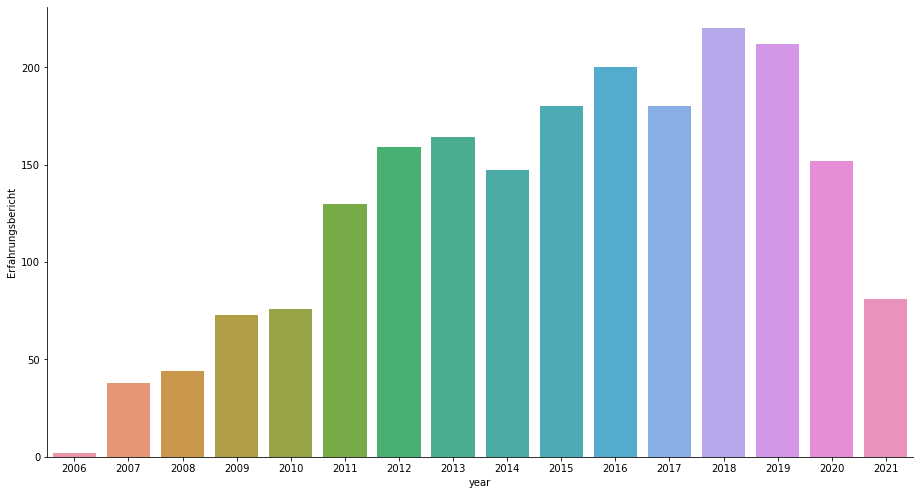

In [196]:
df_year_count=df.groupby(['year'],as_index=False).count()
df_year_count=df_year_count[['year','Erfahrungsbericht']]
df_year_count
g=sns.catplot(x="year",y="Erfahrungsbericht",data=df_year_count,kind="bar")
g.fig.set_size_inches(14,7)

<h2 id="basic_grouping">Klinik by Klinik</h2>

In [102]:
df["Name der Klinik"].unique()

array(['Herzogin Elisabeth Hospital', 'Klinik am Zuckerberg',
       'Klinikum Wolfsburg', 'Klinikum Peine', 'St. Martini Krankenhaus',
       'DIAKOVERE Henriettenstift', 'Eilenriede Klinik Hannover',
       'Sophienklinik', 'KRH Klinikum Agness Karll Laatzen',
       'Klinikum Wahrendorff', 'AMEOS Klinikum Hildesheim',
       'Helios Kliniken Mittelweser', 'HELIOS Klinik Cuxhaven',
       'AMEOS Klinikum Seepark Geestland', 'Krankenhaus Buchholz',
       'Krankenhaus Winsen', 'Psychiatrische Klinik Lüneburg'],
      dtype=object)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


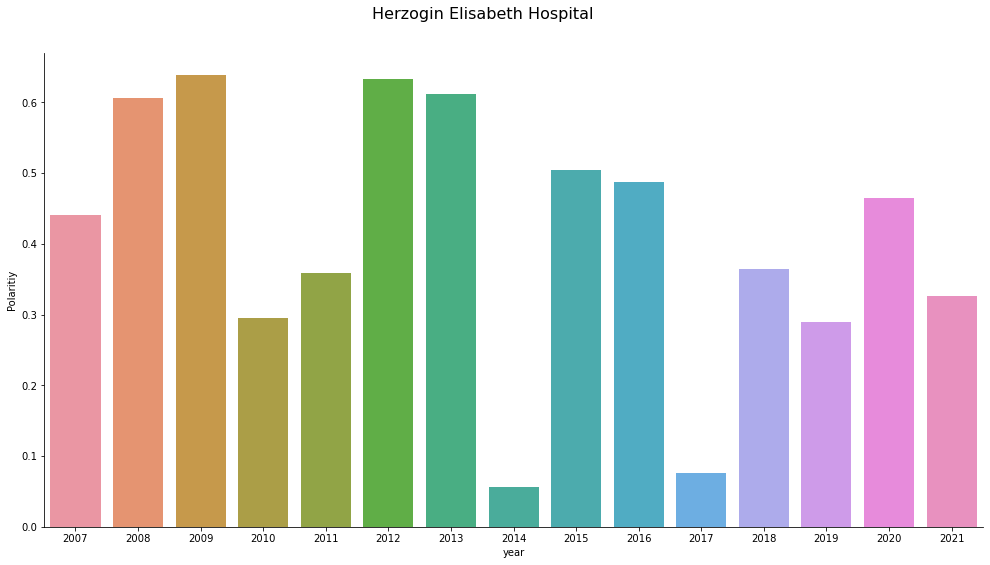

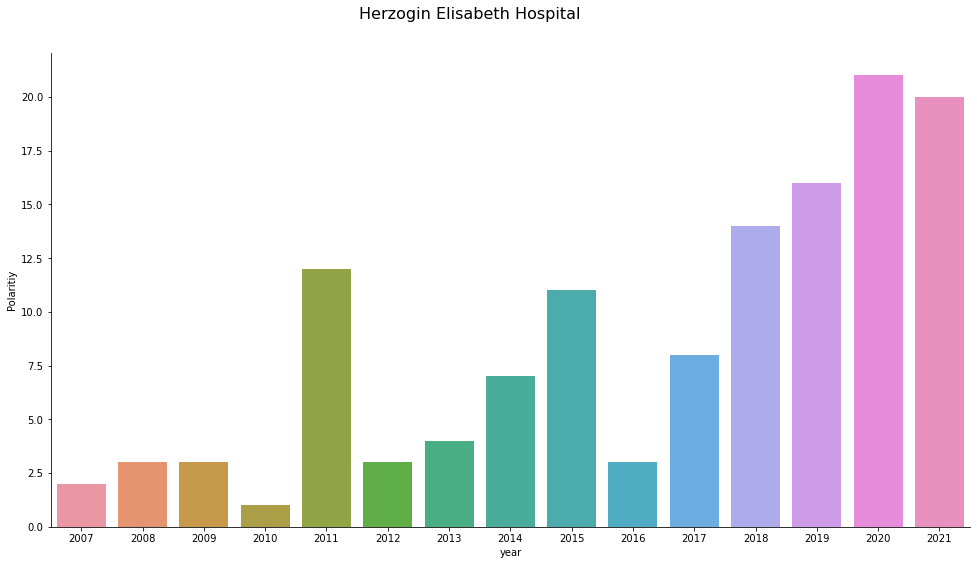

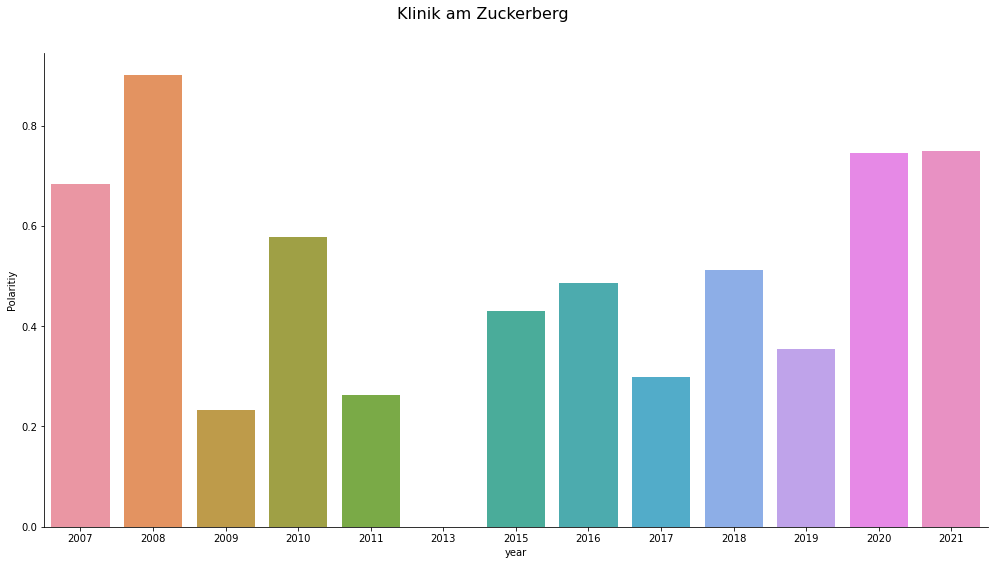

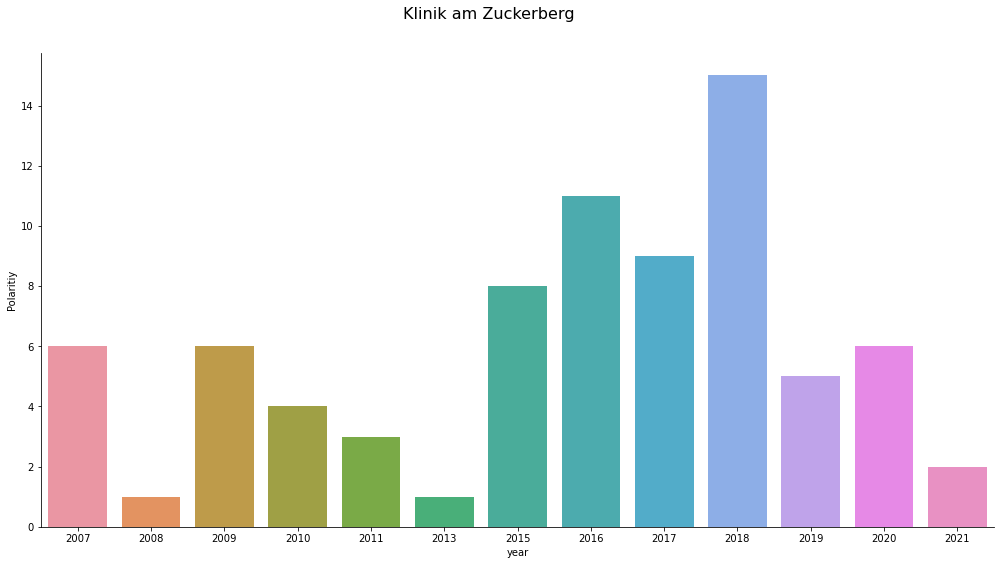

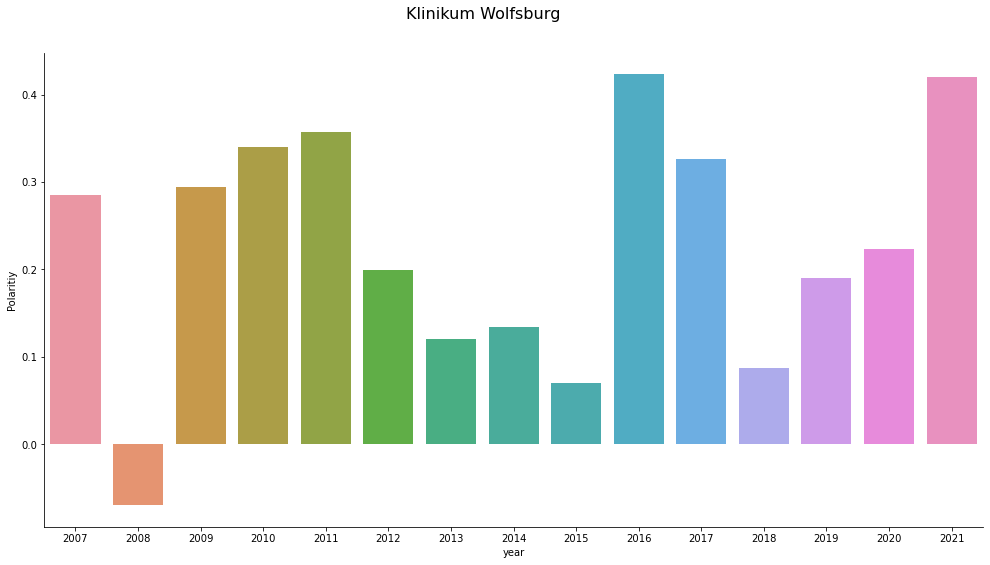

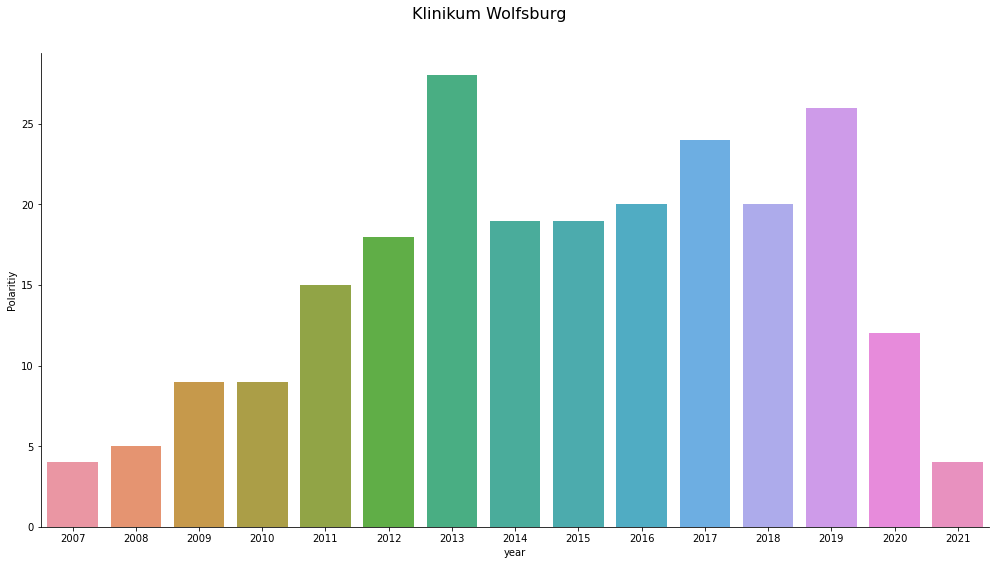

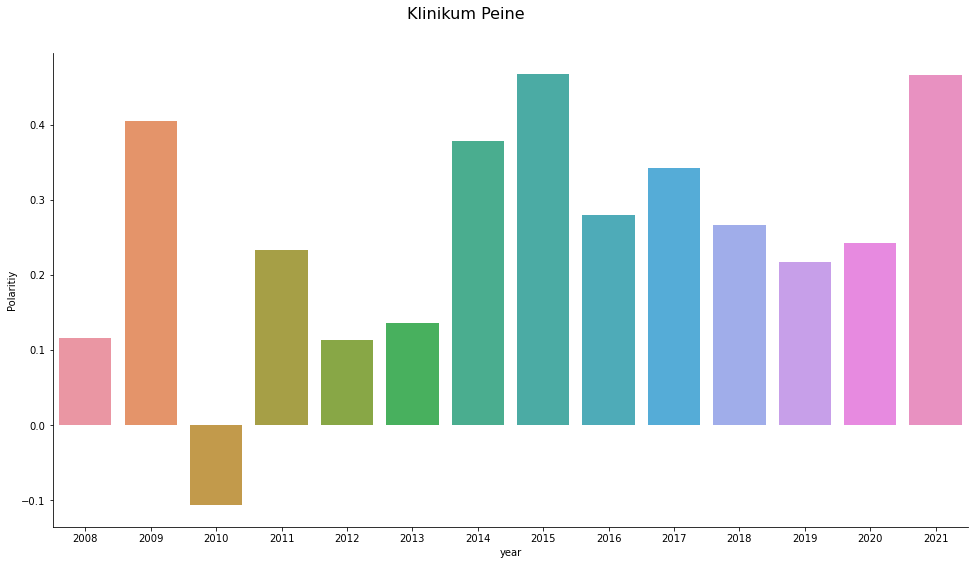

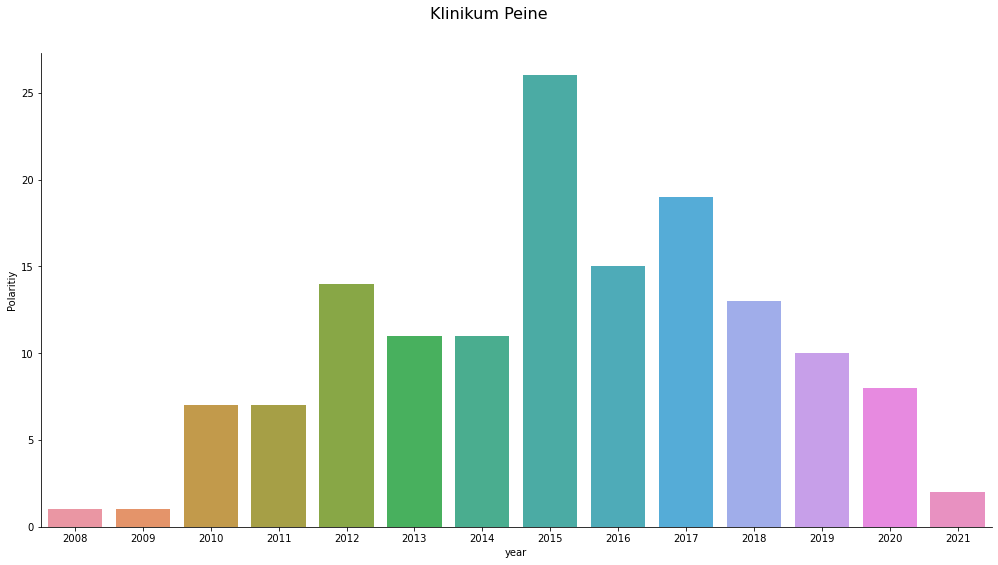

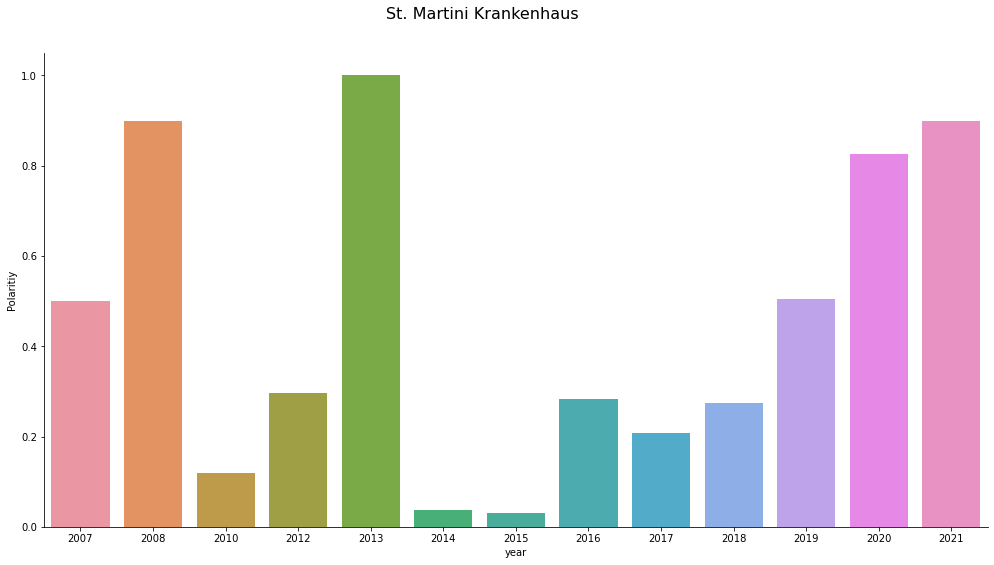

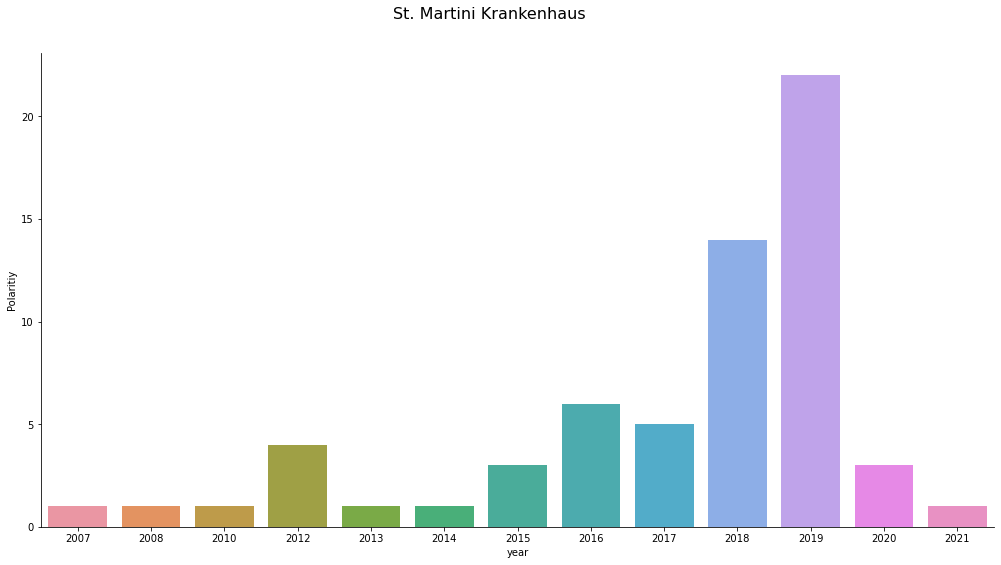

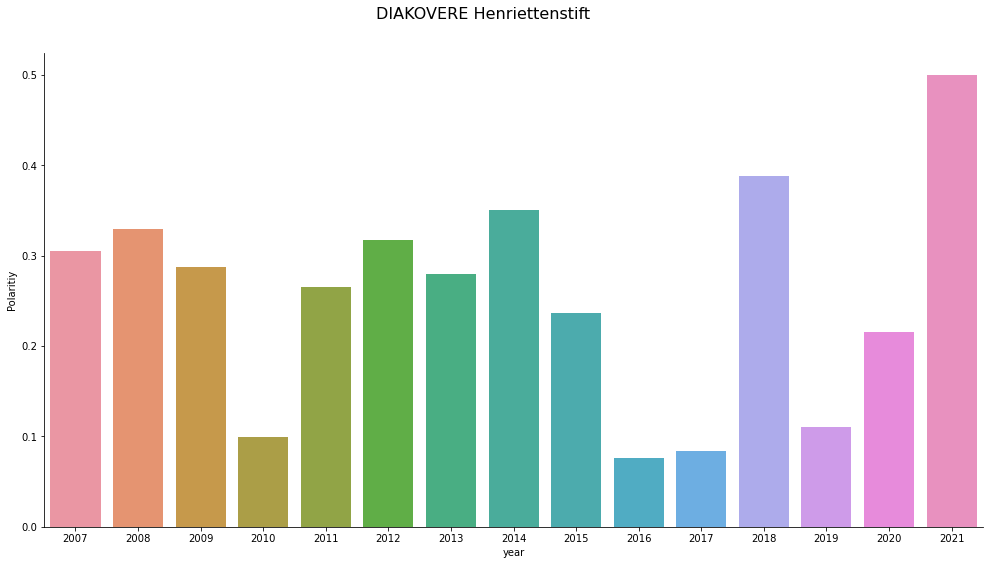

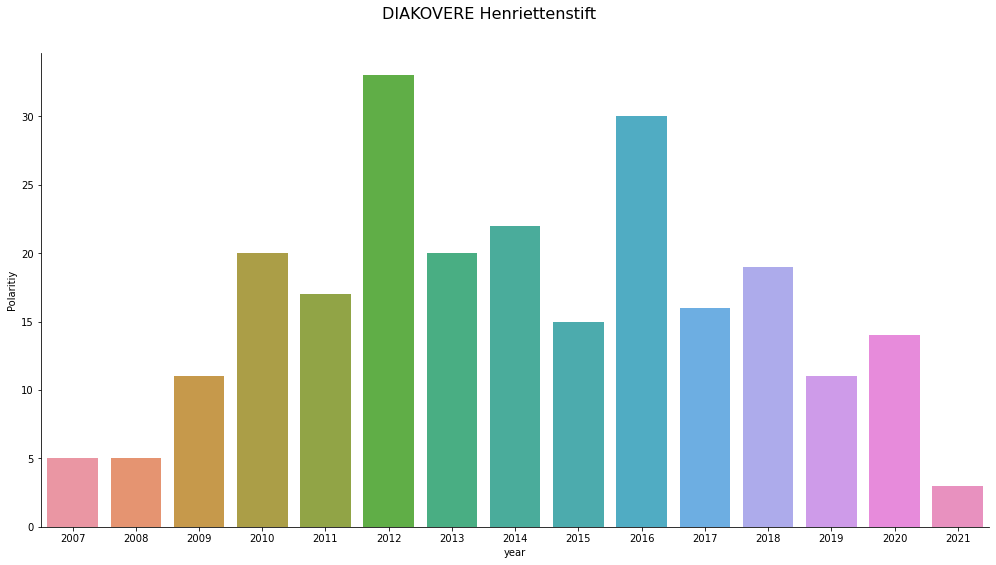

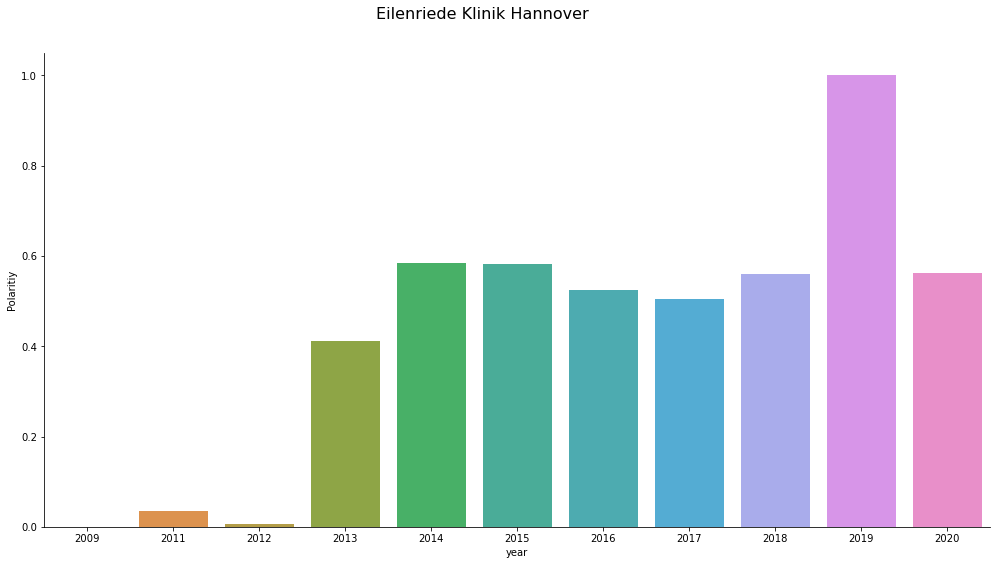

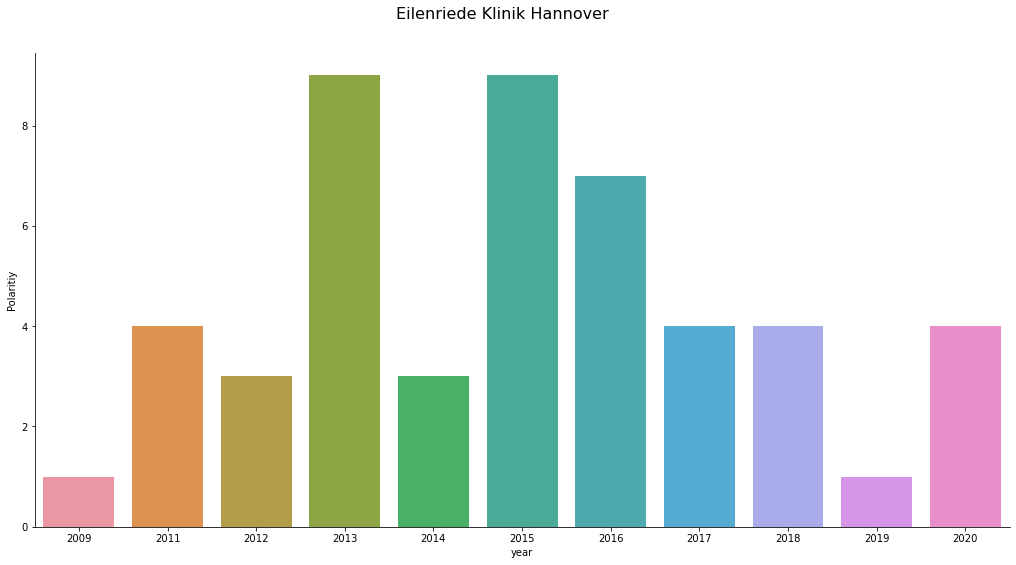

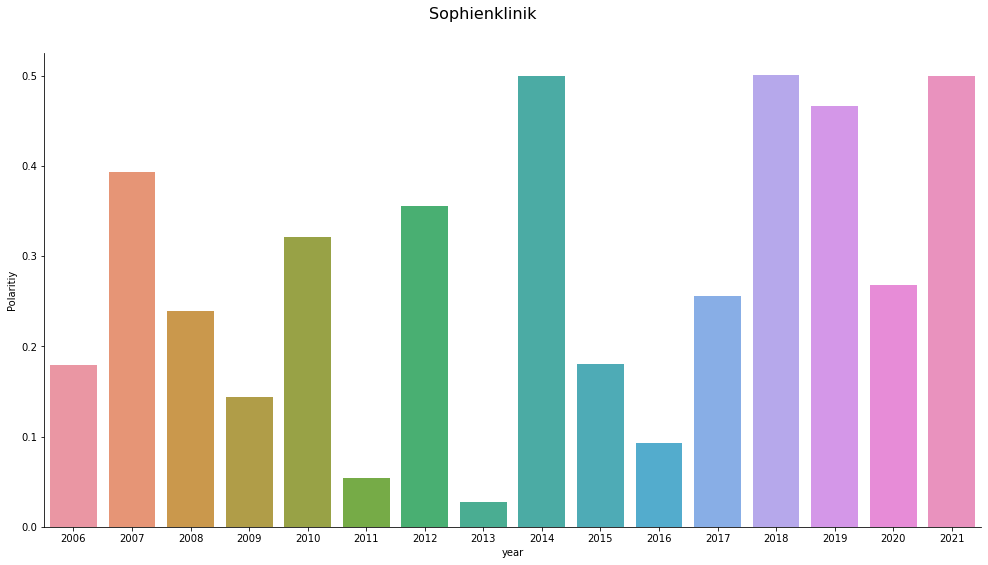

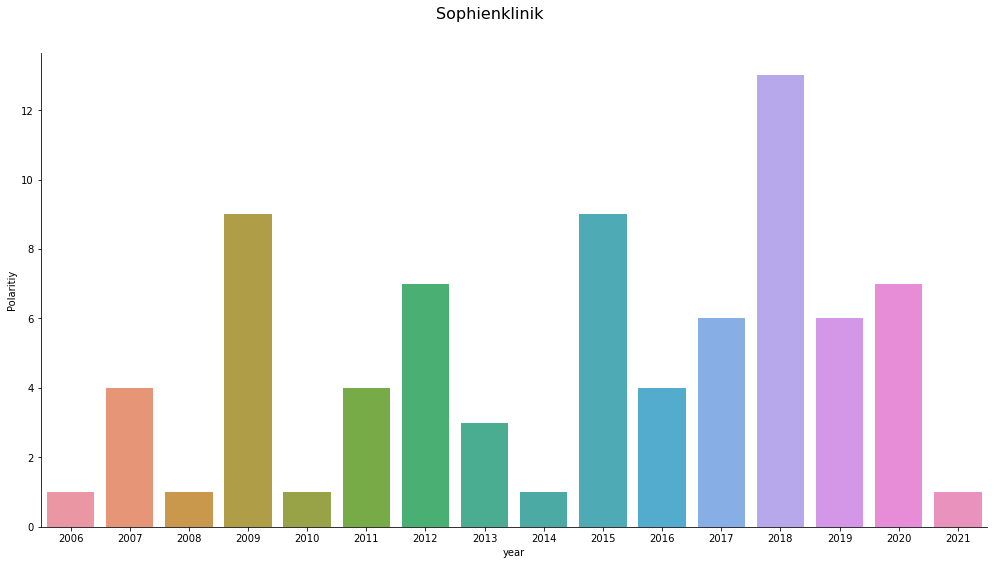

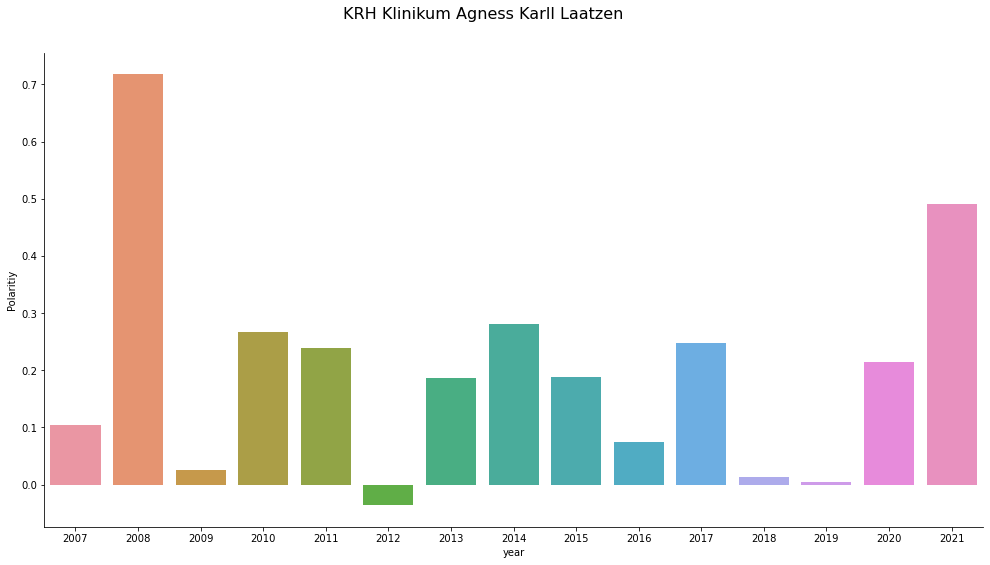

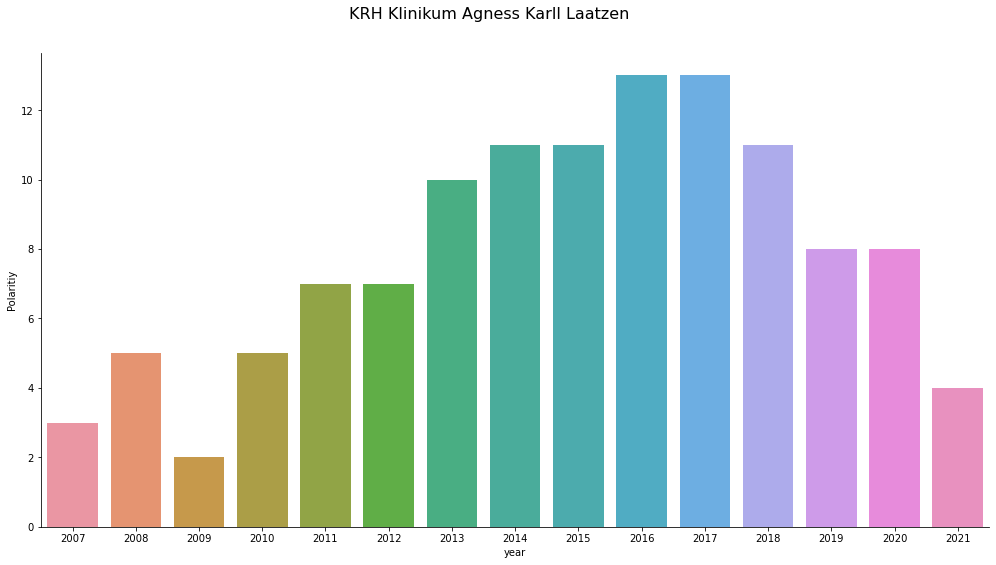

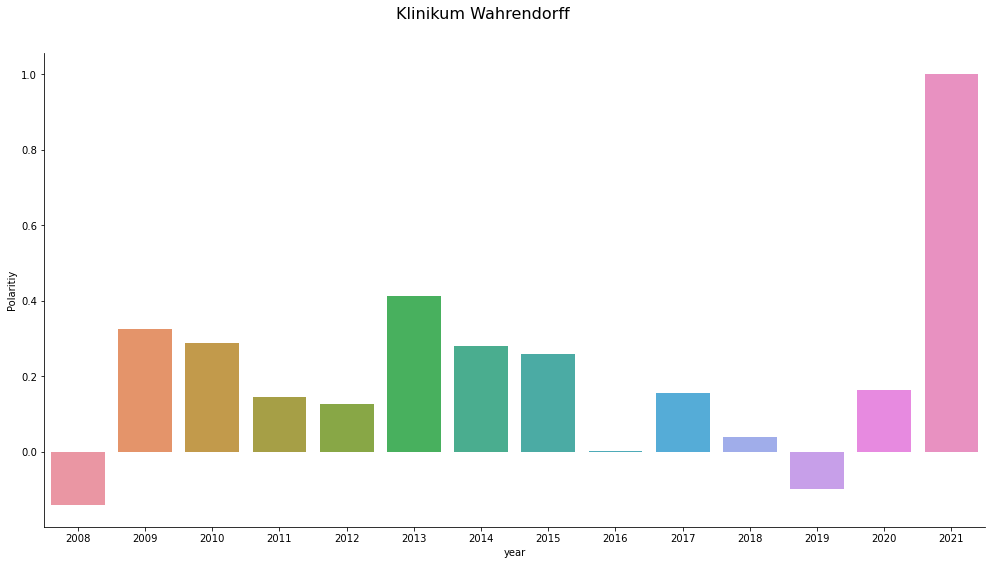

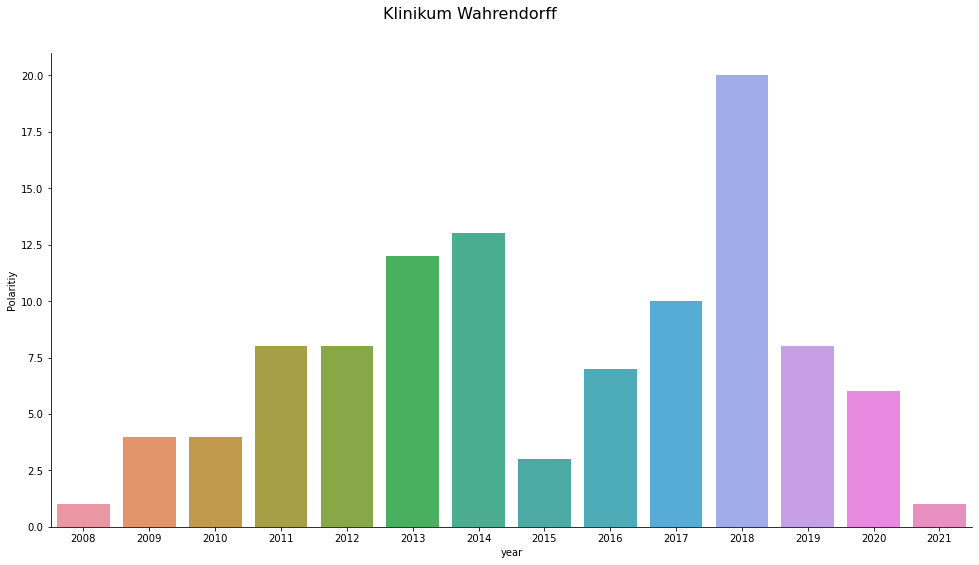

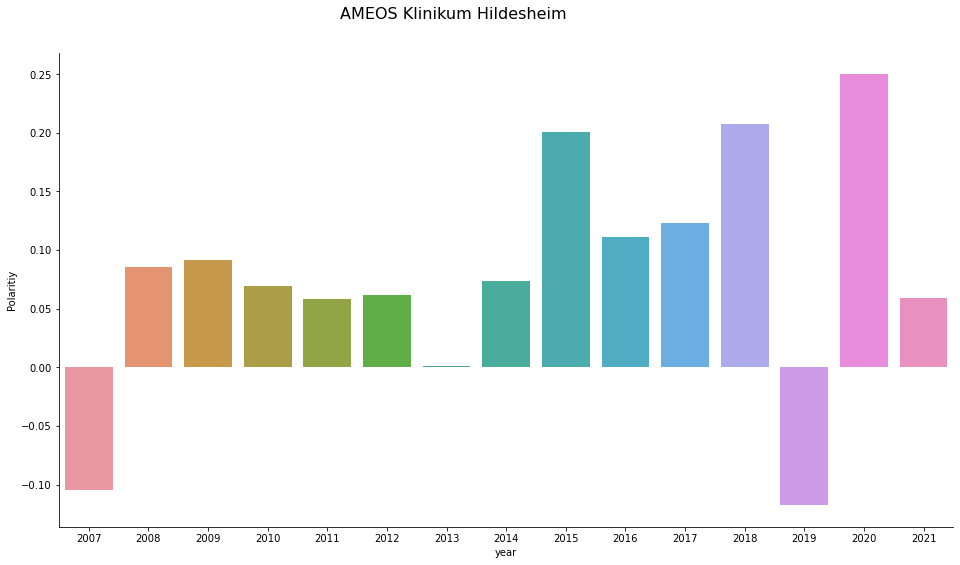

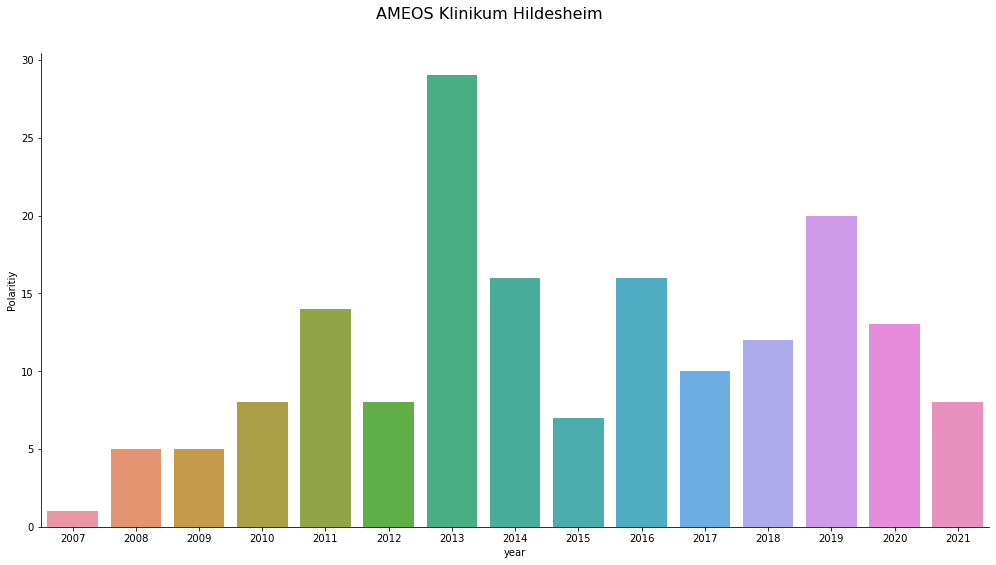

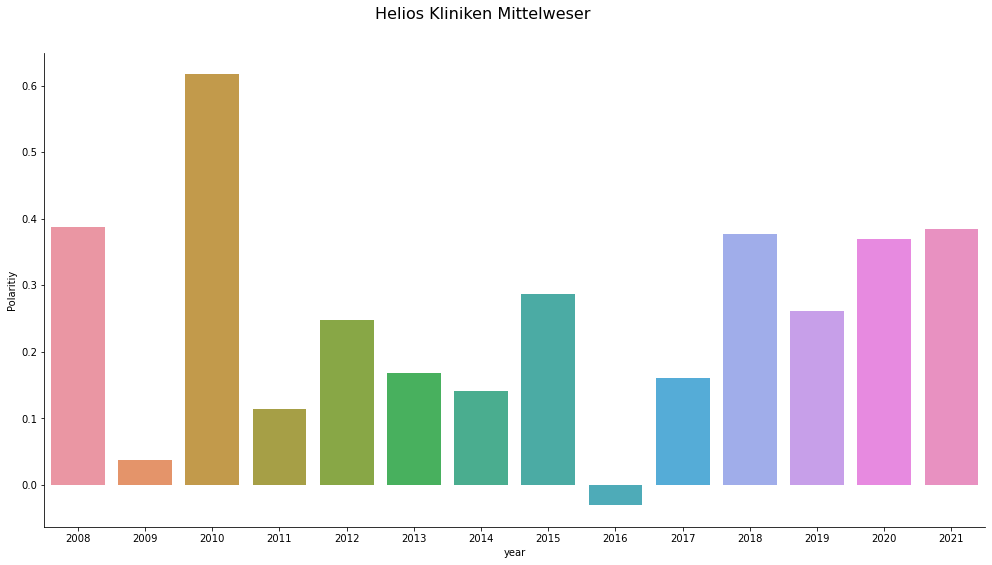

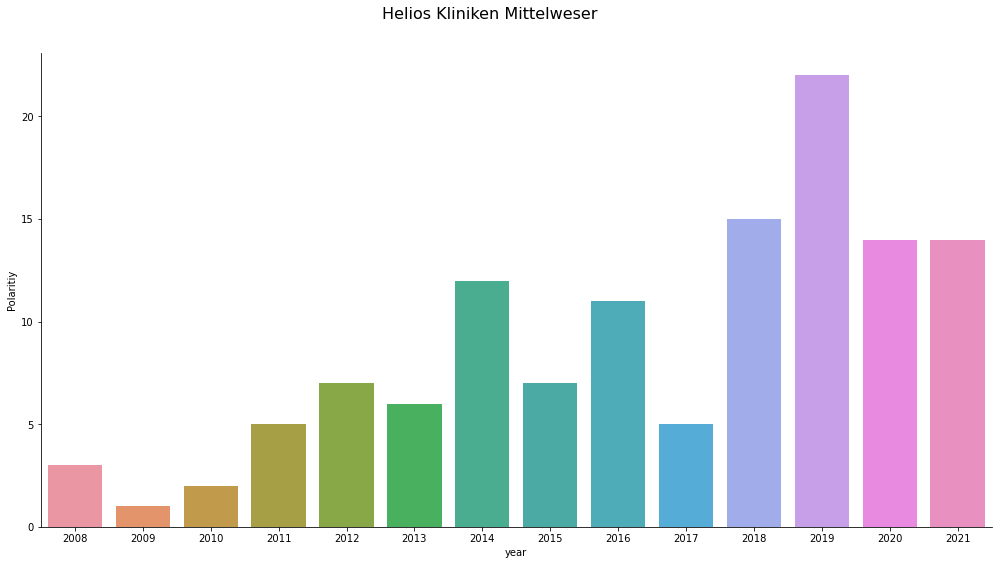

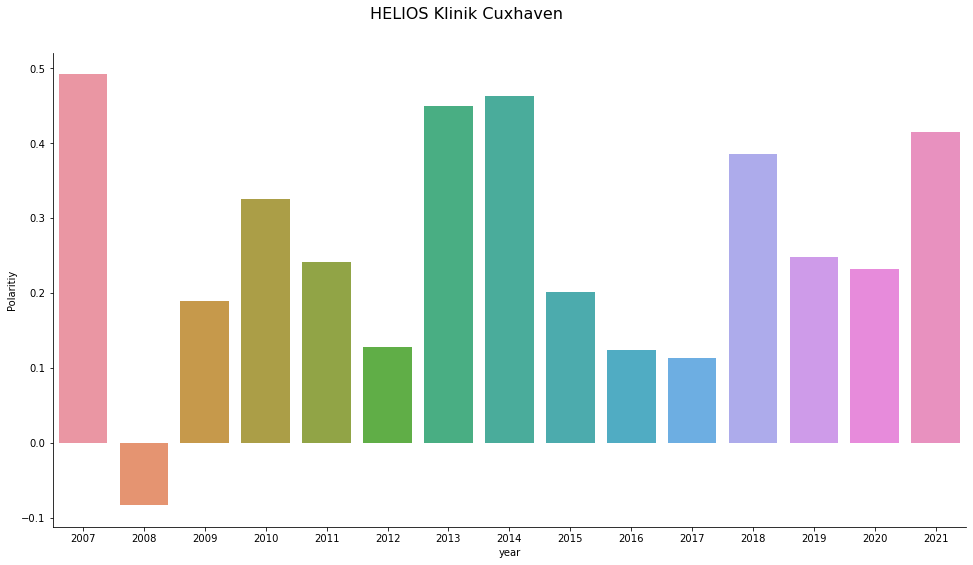

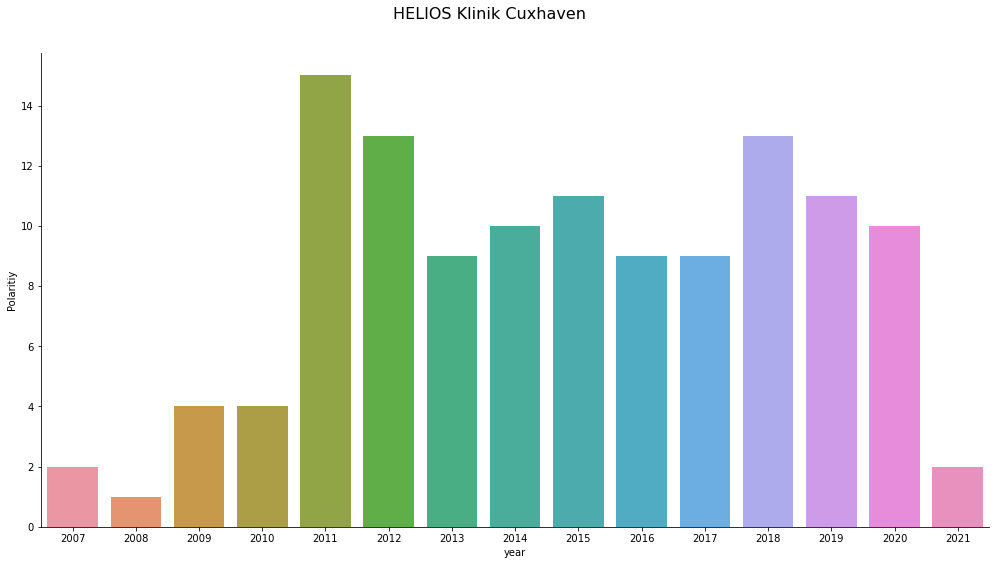

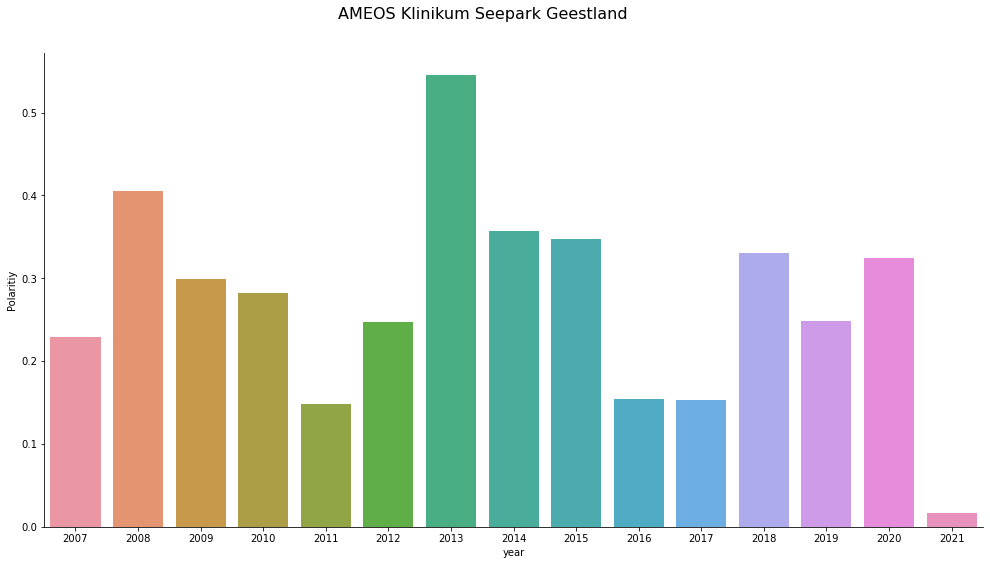

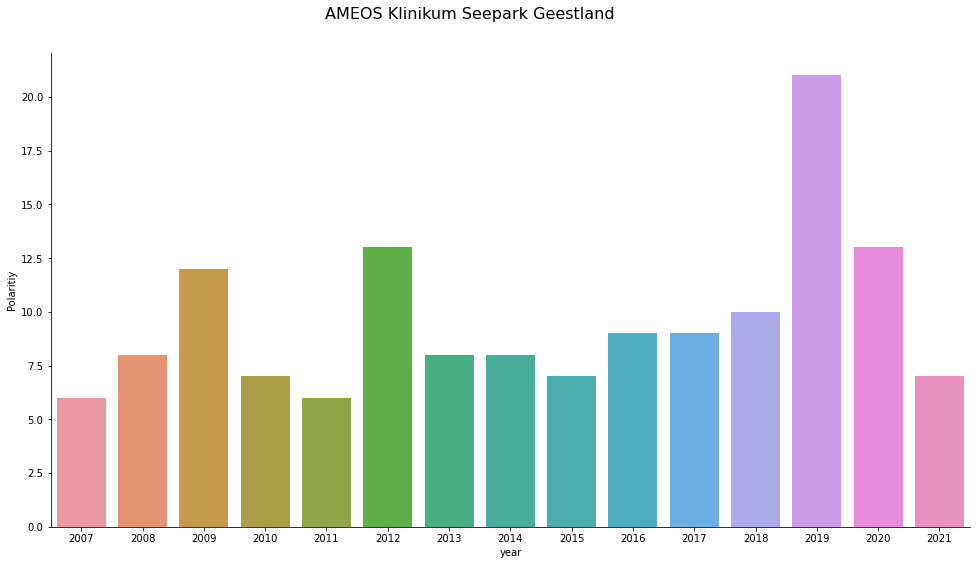

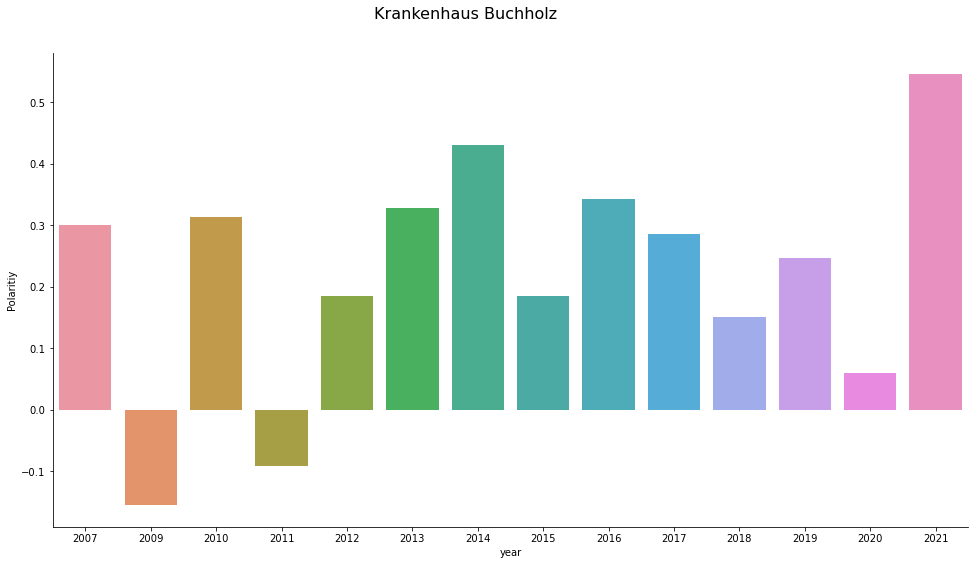

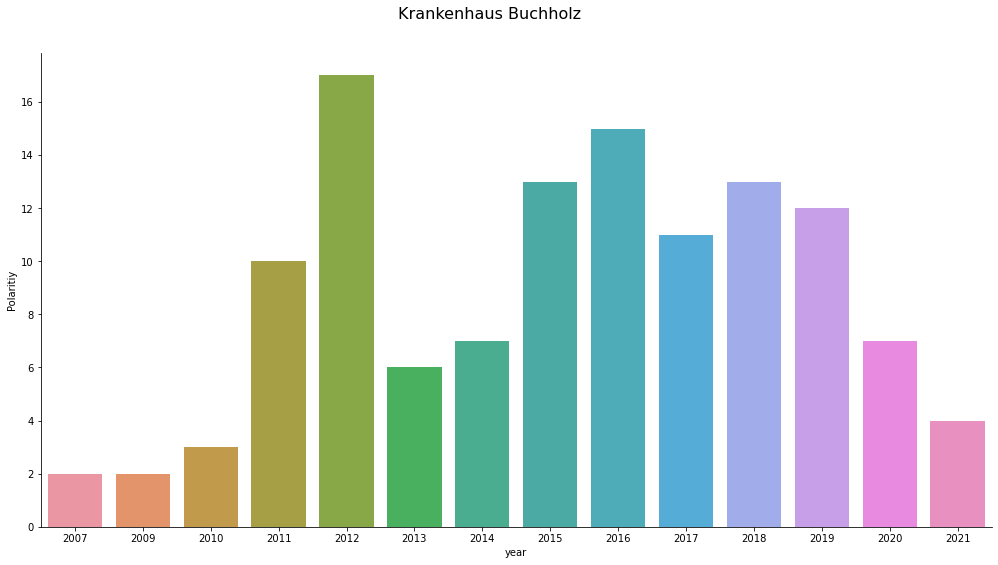

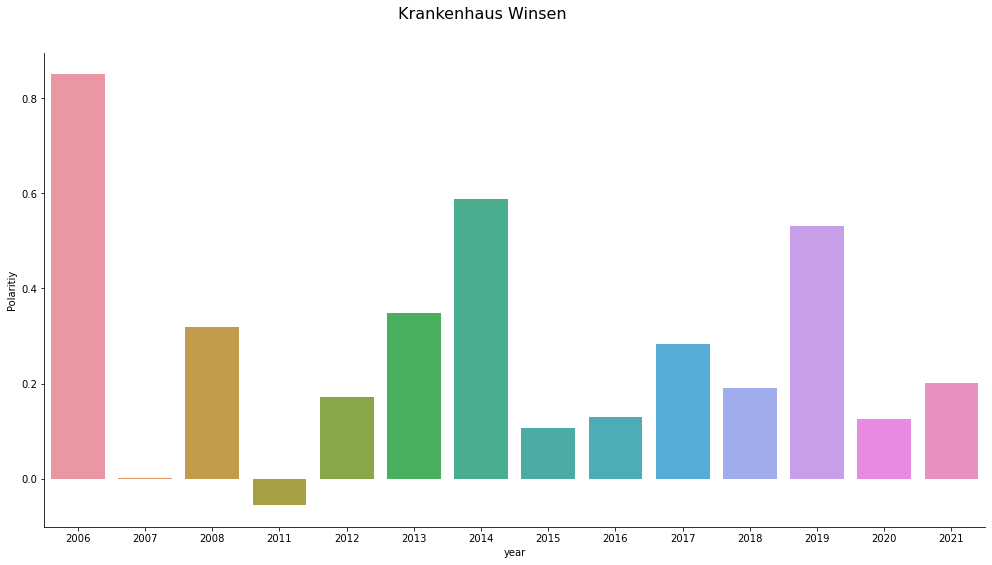

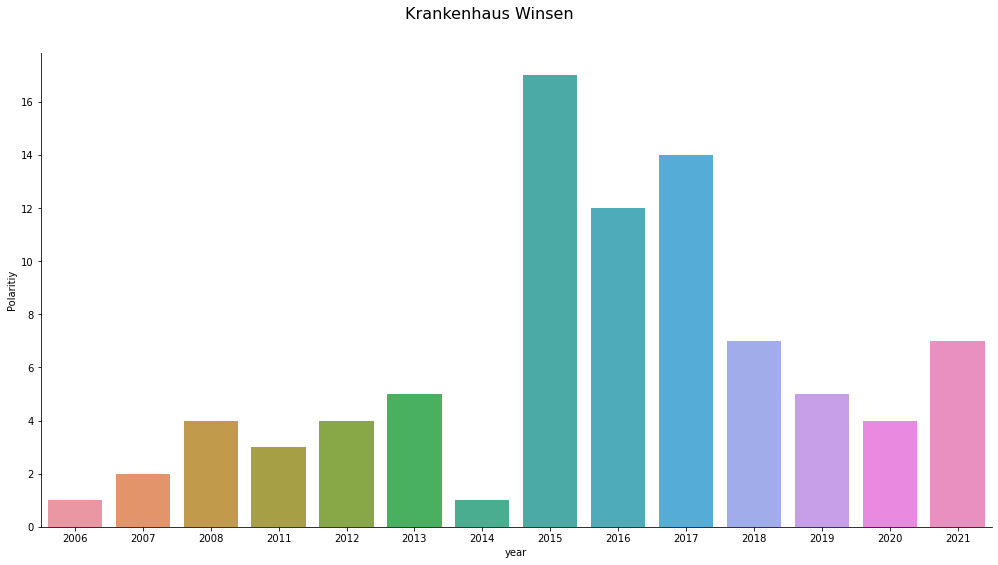

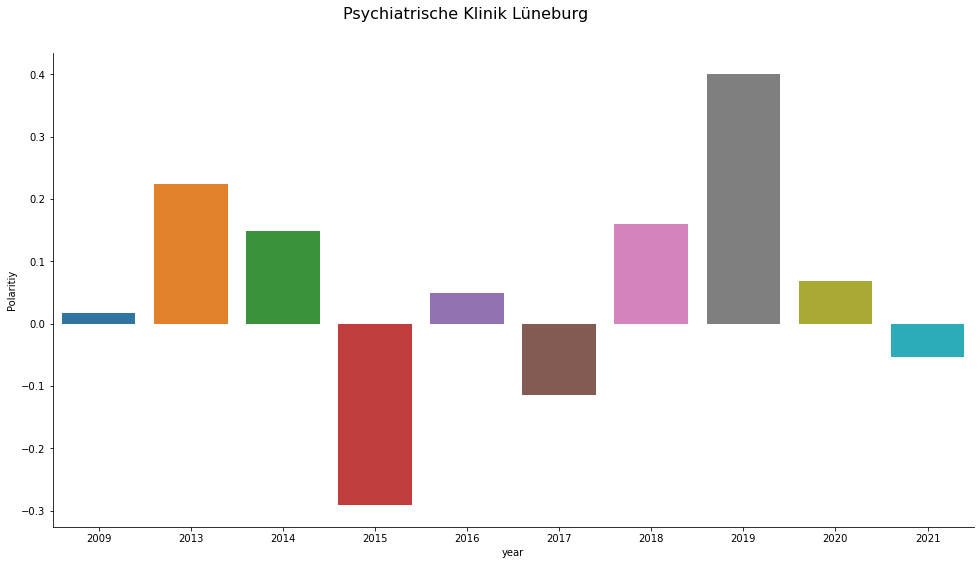

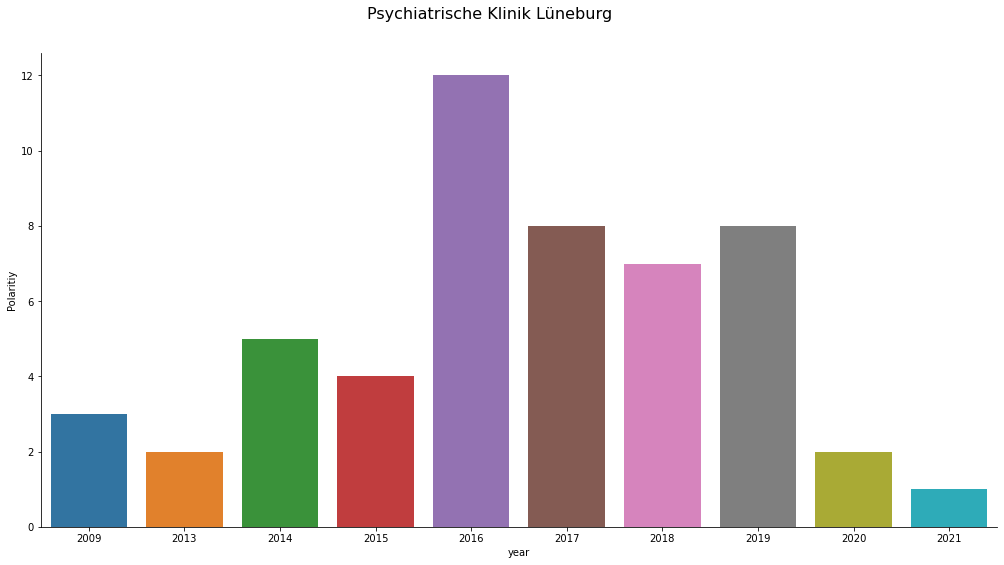

In [163]:
for klinik in df["Name der Klinik"].unique():
    
    g=sns.catplot(x="year",y="Polaritiy",data=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).mean(),kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="klinik photos/klinik Polaritiy_"+klinik+".png"
    #g.fig.savefig(name)

    g=sns.catplot(x="year",y="Polaritiy",data=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count(),kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="klinik photos/klinik counts_"+klinik+".png"
    #g.fig.savefig(name)



[1, 2, 3, 1, 11, 3, 4, 3, 11, 3, 5, 14, 14, 19]
[1, 1, 0, 0, 1, 0, 0, 4, 0, 0, 3, 0, 2, 2]


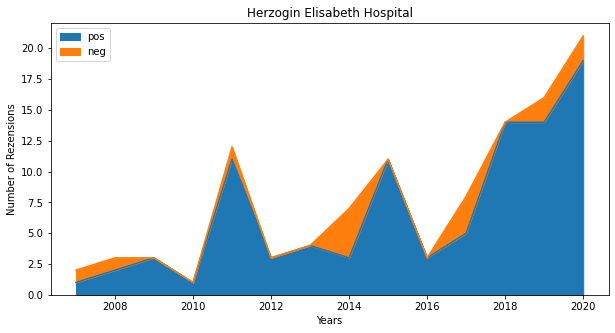

[6, 1, 5, 3, 3, 0, 1, 0, 8, 11, 7, 13, 5, 6]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0]


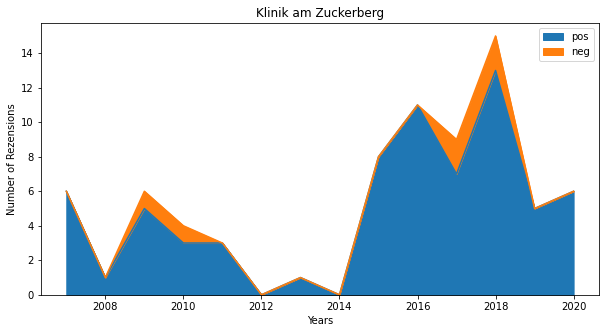

[4, 3, 8, 7, 14, 15, 18, 14, 13, 16, 22, 13, 19, 8]
[0, 2, 1, 2, 1, 3, 10, 5, 6, 4, 2, 7, 7, 4]


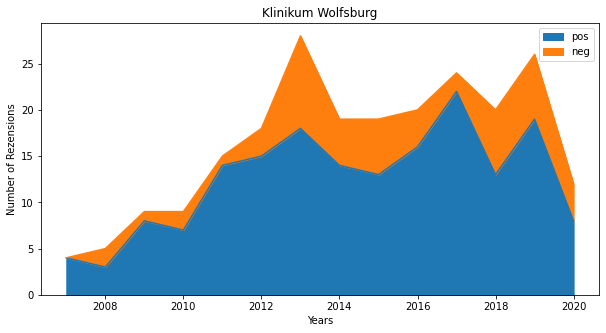

[1, 1, 3, 6, 9, 7, 9, 25, 10, 14, 11, 7, 5]
[0, 0, 4, 1, 5, 4, 2, 1, 5, 5, 2, 3, 3]


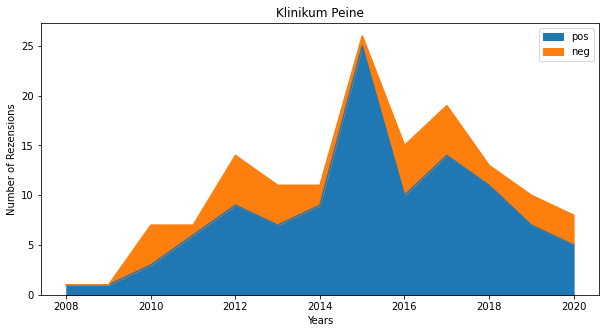

[1, 1, 0, 1, 0, 3, 1, 1, 1, 4, 3, 11, 21, 3]
[0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 3, 1, 0]


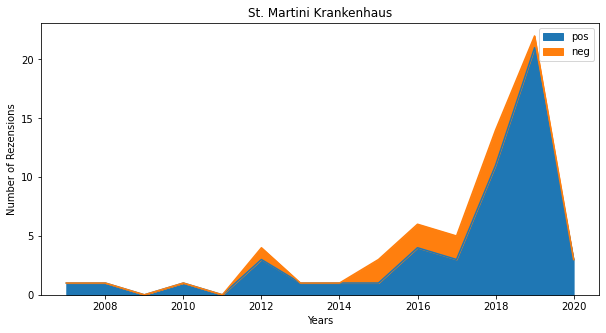

[4, 5, 9, 11, 13, 28, 18, 18, 9, 15, 11, 16, 9, 10]
[1, 0, 2, 9, 4, 5, 2, 4, 6, 15, 5, 3, 2, 4]


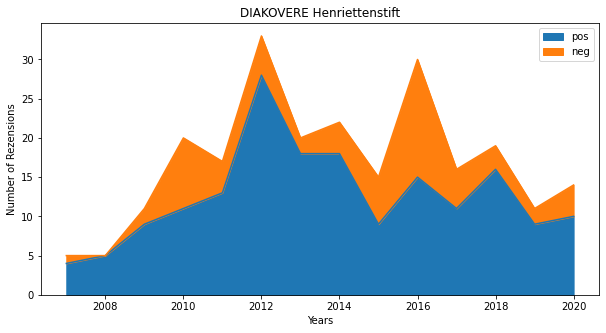

[1, 0, 2, 1, 9, 3, 8, 7, 4, 4, 1]
[0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0]


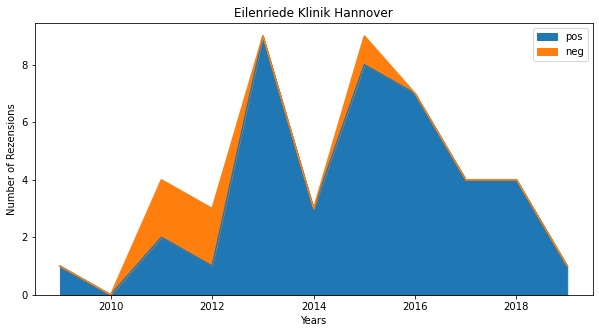

[1, 3, 1, 7, 1, 3, 6, 2, 1, 7, 3, 4, 10, 5, 4]
[0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 3, 1, 3]


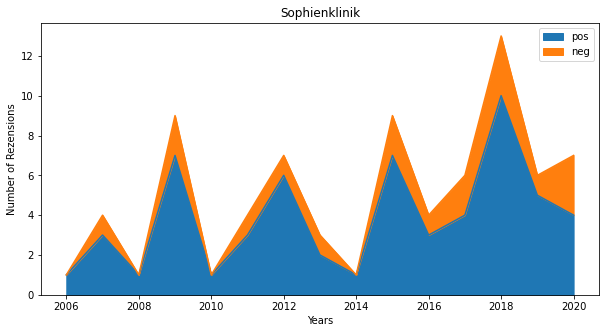

[2, 5, 2, 5, 5, 3, 7, 9, 7, 8, 10, 5, 4, 6]
[1, 0, 0, 0, 2, 4, 3, 2, 4, 5, 3, 6, 4, 2]


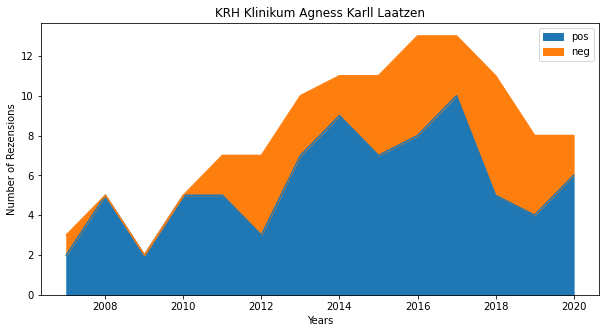

[0, 3, 3, 4, 4, 11, 11, 3, 3, 8, 11, 4, 4]
[1, 1, 1, 4, 4, 1, 2, 0, 4, 2, 9, 4, 2]


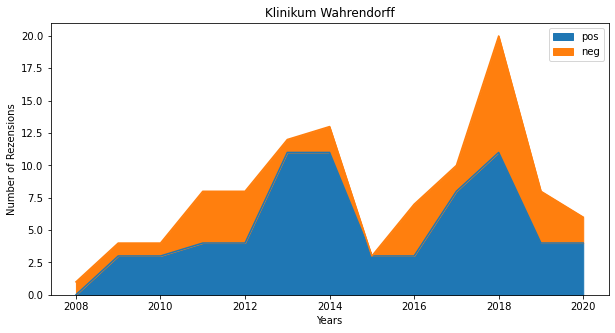

[0, 3, 4, 5, 8, 4, 19, 9, 4, 11, 6, 10, 10, 10]
[1, 2, 1, 3, 6, 4, 10, 7, 3, 5, 4, 2, 10, 3]


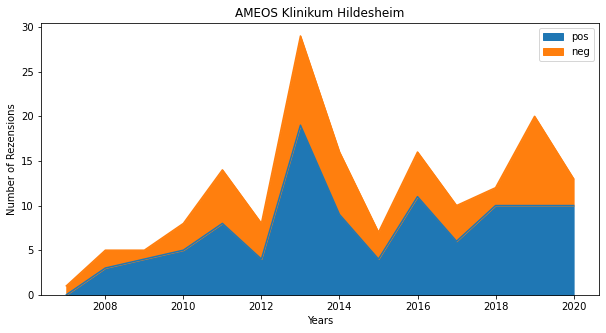

[3, 1, 2, 3, 5, 4, 9, 6, 5, 5, 14, 18, 13]
[0, 0, 0, 2, 2, 2, 3, 1, 6, 0, 1, 4, 1]


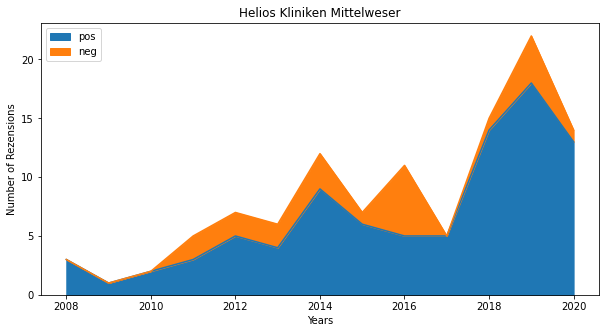

[2, 0, 3, 4, 12, 8, 8, 8, 8, 7, 5, 11, 8, 7]
[0, 1, 1, 0, 3, 5, 1, 2, 3, 2, 4, 2, 3, 3]


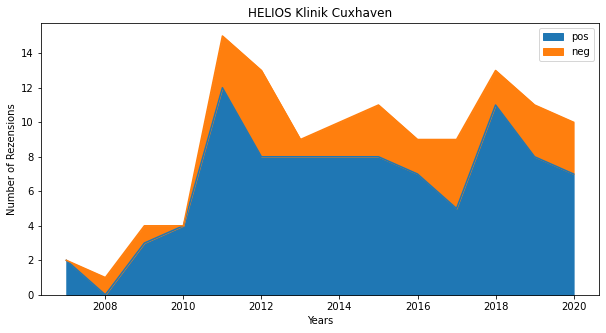

[4, 7, 12, 5, 5, 12, 8, 8, 6, 6, 7, 8, 19, 12]
[2, 1, 0, 2, 1, 1, 0, 0, 1, 3, 2, 2, 2, 1]


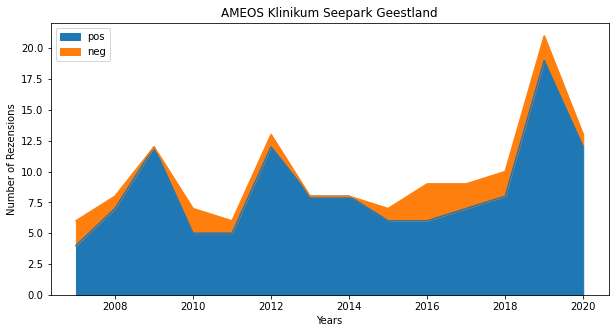

[2, 0, 0, 2, 6, 13, 6, 6, 9, 11, 8, 6, 9, 5]
[0, 0, 2, 1, 4, 4, 0, 1, 4, 4, 3, 7, 3, 2]


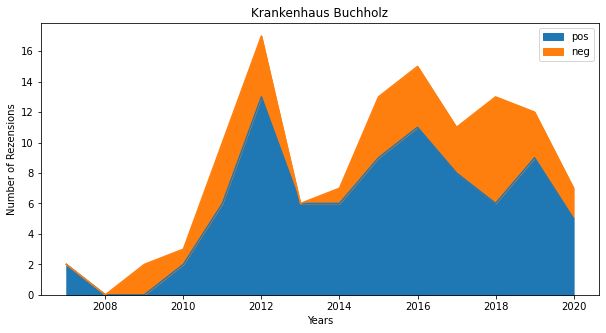

[1, 1, 3, 0, 0, 1, 4, 4, 1, 10, 8, 12, 5, 5, 3]
[0, 1, 1, 0, 0, 2, 0, 1, 0, 7, 4, 2, 2, 0, 1]


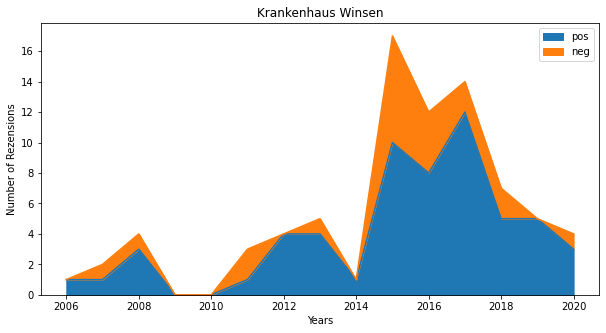

[1, 0, 0, 0, 2, 4, 1, 8, 5, 4, 7, 1]
[2, 0, 0, 0, 0, 1, 3, 4, 3, 3, 1, 1]


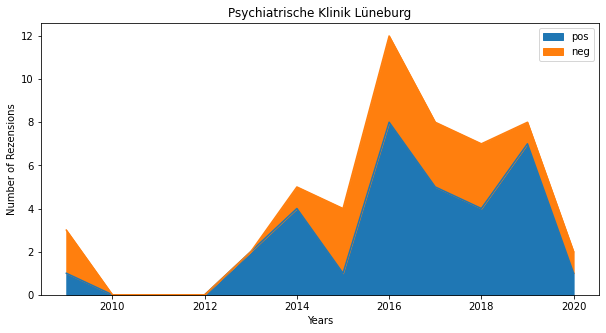

In [278]:
for klinik in df["Name der Klinik"].unique():
    first=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'][0]
    end=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'][len(df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'])-1]
    pos,neg=[],[]
    for i in range(first,end):
        pos.append(len(df[(df["Name der Klinik"]==klinik) & (df["positive"]==1) & (df["year"]==i)]))
        neg.append(len(df[(df["Name der Klinik"]==klinik) & (df["positive"]==0)& (df["year"]==i)]))

    print(pos)
    print(neg)
    years = [i for i in range(first,end)]
    len(years)
    d = {'pos': pos, 'neg':neg}
    temp_df = pd.DataFrame(data=d)
    temp_df.index=years

    temp_df.index = temp_df.index.map(int)
    temp_df.plot(kind='area', 
                 stacked=True,

                 figsize=(10, 5), # pass a tuple (x, y) size
                 )

    plt.title(klinik)
    plt.ylabel('Number of Rezensions')
    plt.xlabel('Years')
    
    plt.savefig('sampleFileName.png')
    name="klinik photos/klinik positive_"+klinik+".png"
    #plt.savefig(name)

    plt.show()

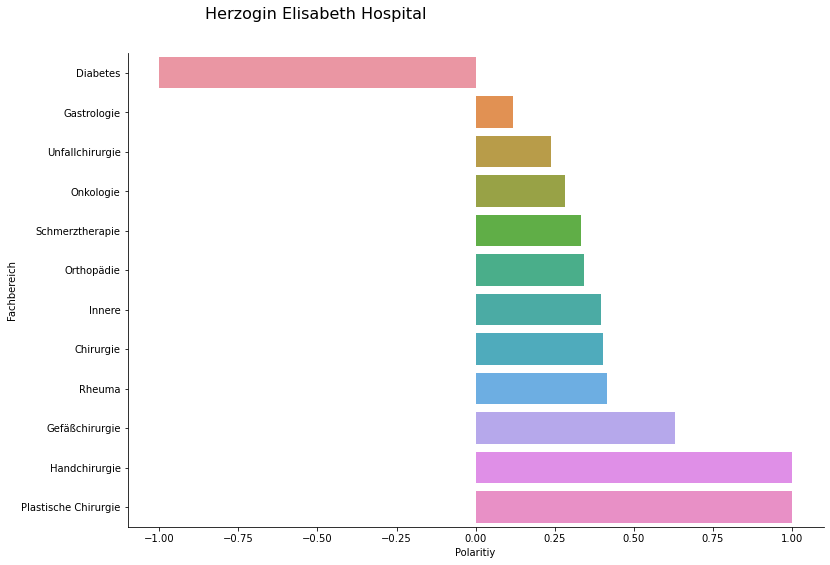

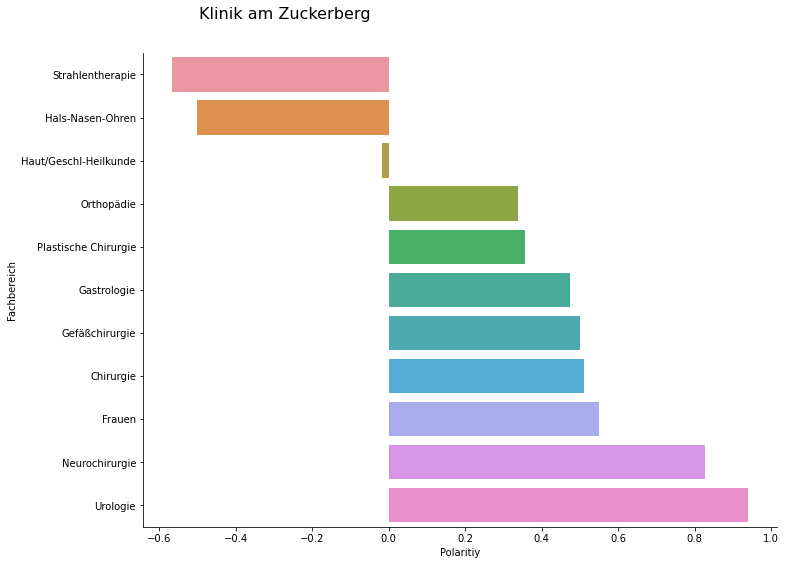

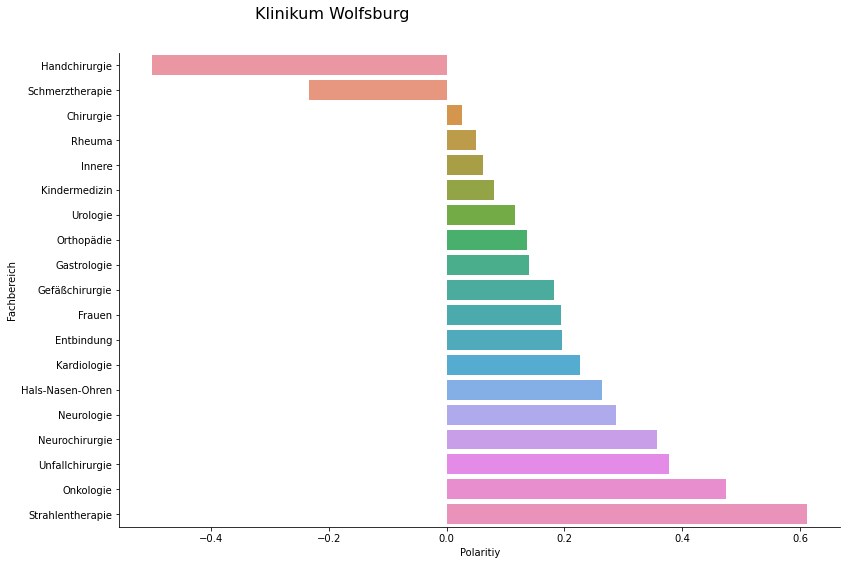

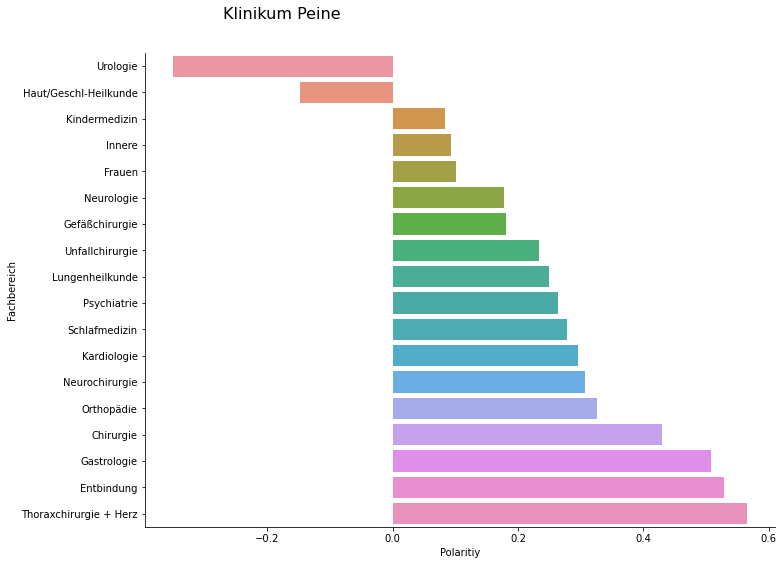

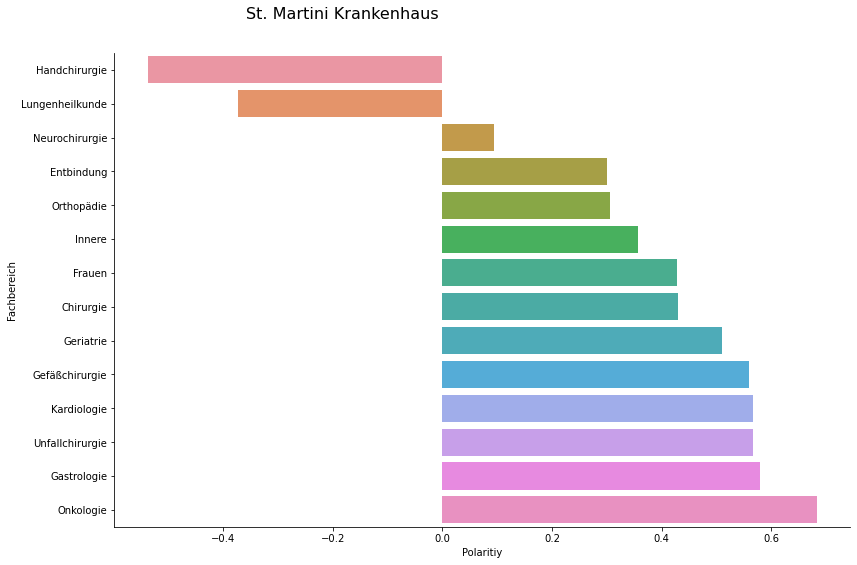

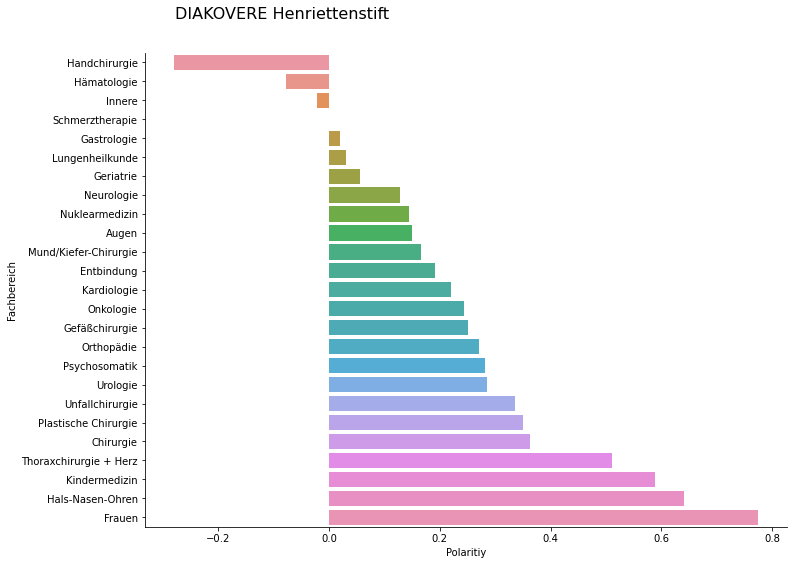

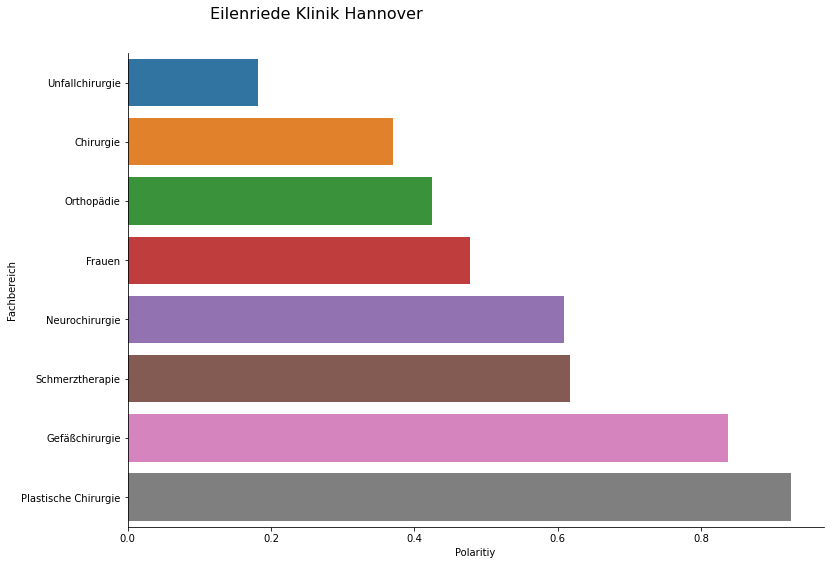

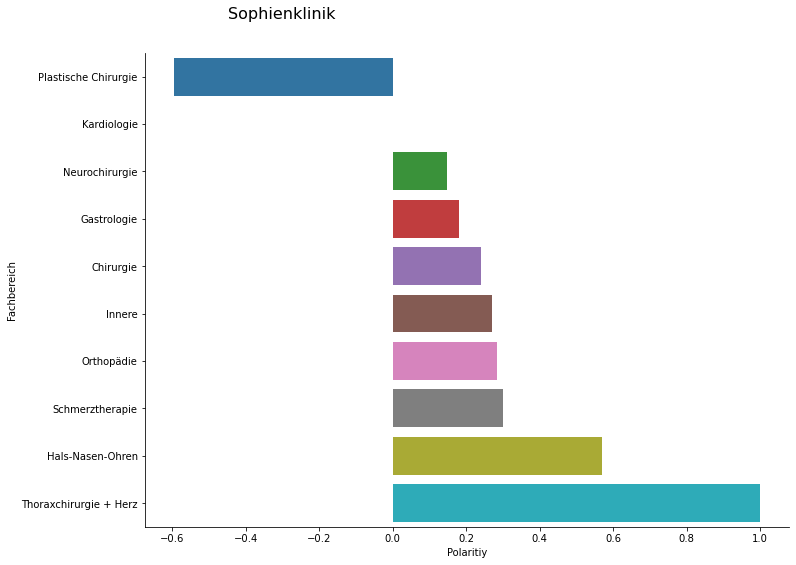

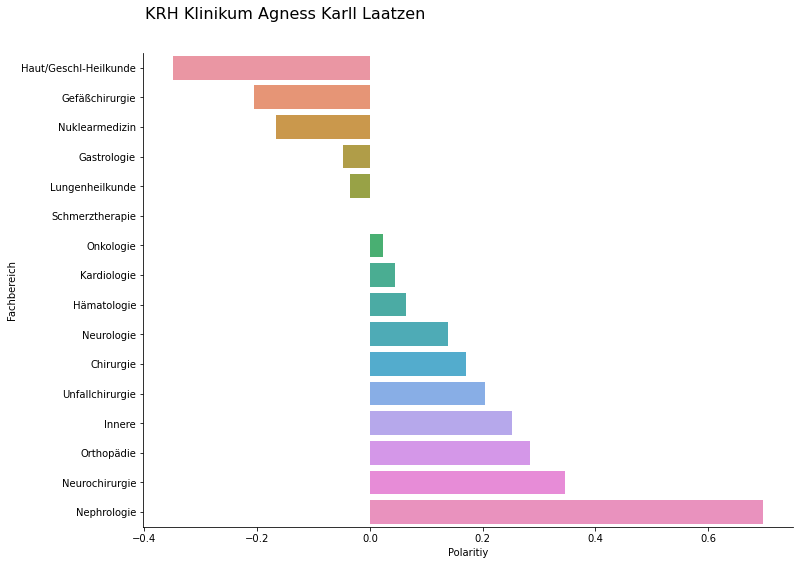

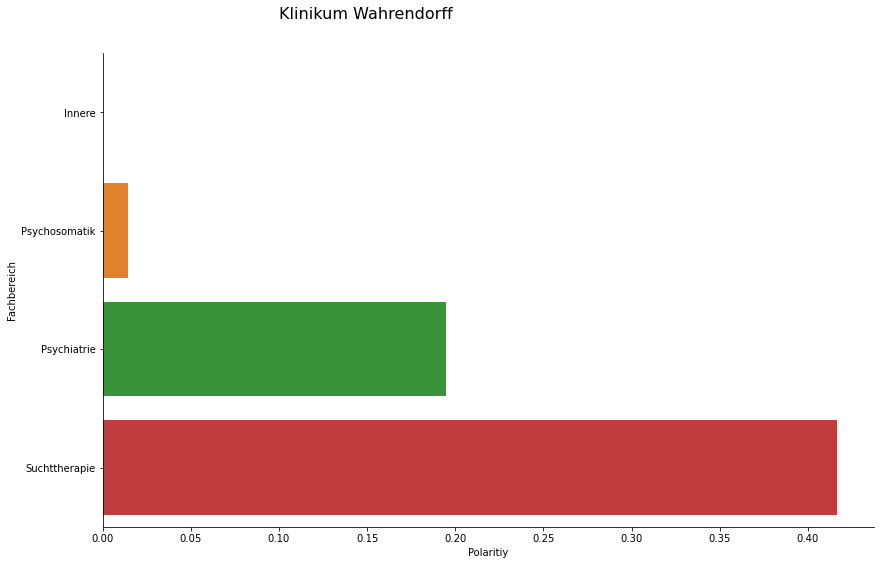

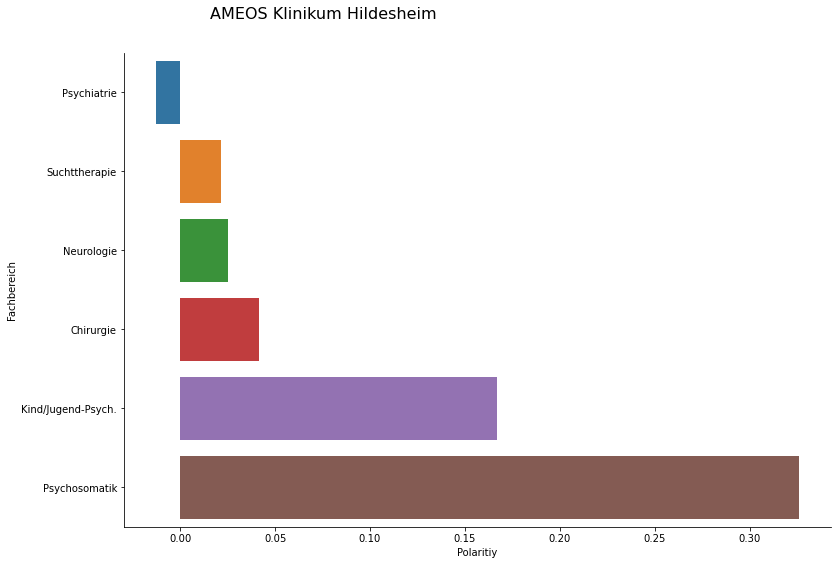

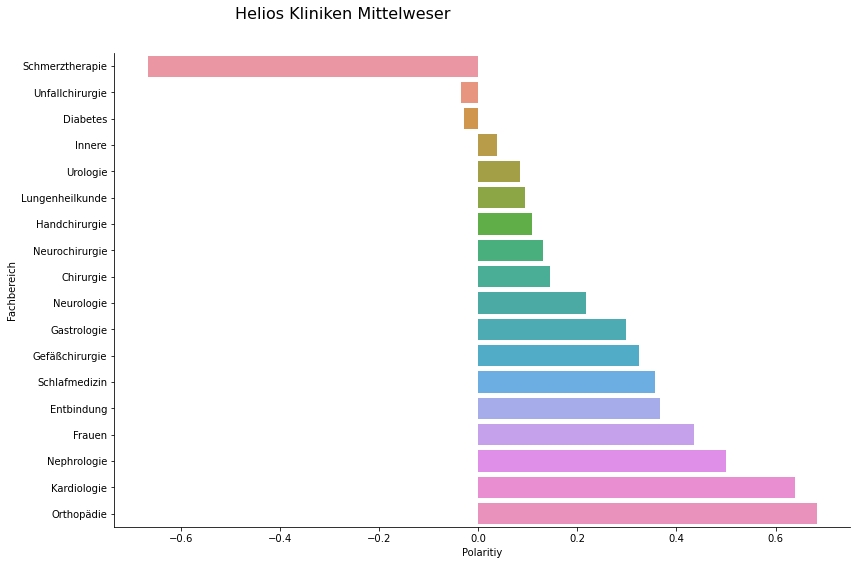

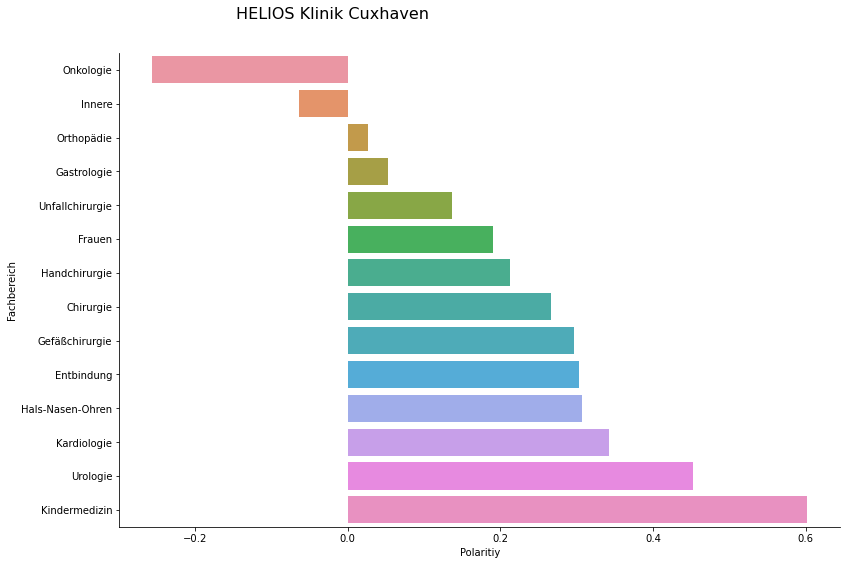

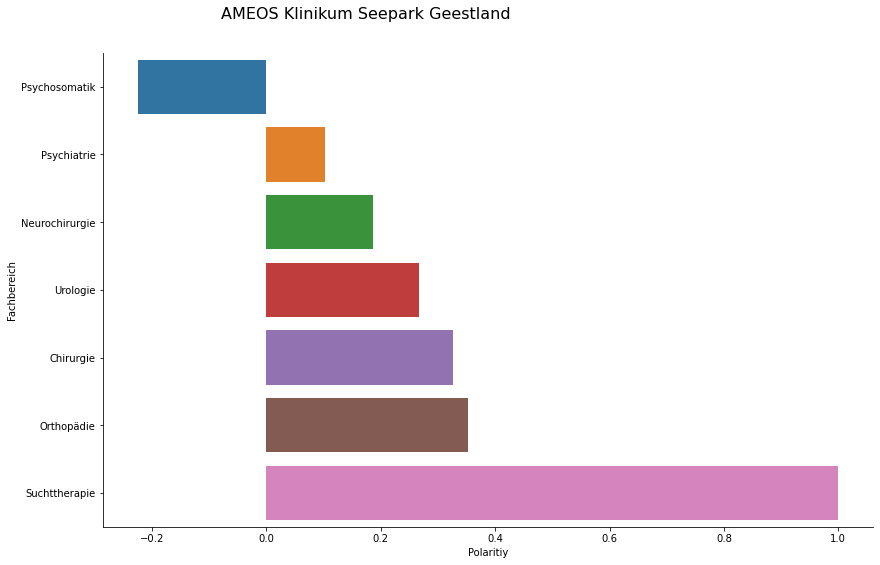

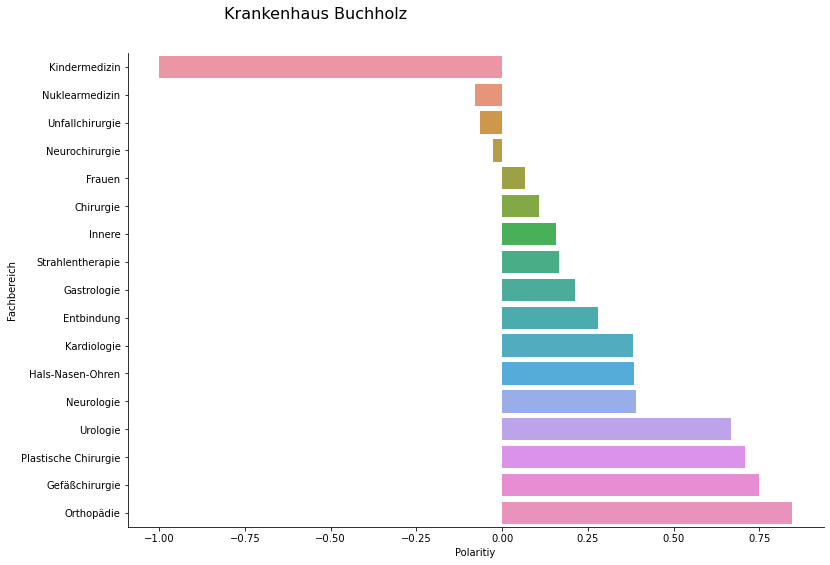

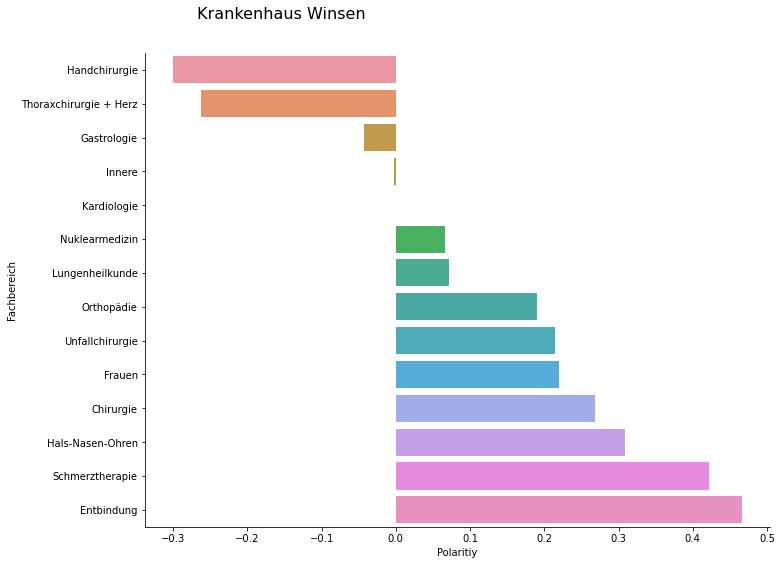

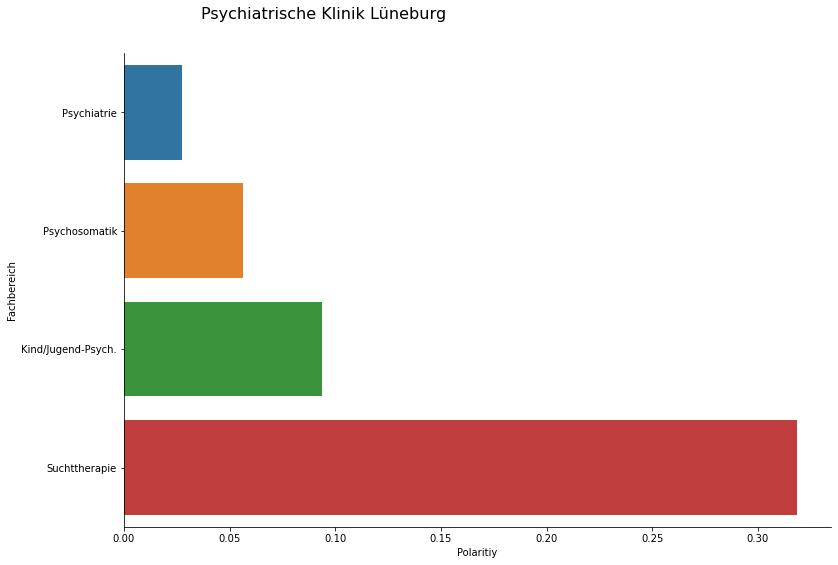

In [292]:
for klinik in df["Name der Klinik"].unique():
    
    g=sns.catplot(x="Polaritiy",y="Fachbereich",data=df[df["Name der Klinik"]==klinik].groupby(['Fachbereich'],as_index=False).mean().sort_values('Polaritiy') ,kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="klinik photos/klinik fachbereich_"+klinik+".png"
    #g.fig.savefig(name)

<h2 id="basic_grouping">Fach by Fach</h2>

In [299]:
fach_pol_df = df[["Name der Klinik","Fachbereich","Polaritiy",]]
fach_pol_gr_df = fach_pol_df.groupby(["Name der Klinik","Fachbereich"],as_index=False).mean()
fach_pol_gr_df.sort_values(by=['Fachbereich','Polaritiy'],ascending=False).head(30)
top_kliniks=fach_pol_gr_df[fach_pol_gr_df["Fachbereich"]=="Orthopädie"].sort_values(by=['Polaritiy'],ascending=True).head()
top_kliniks

,Name der Klinik,Fachbereich,Polaritiy
57,HELIOS Klinik Cuxhaven,Orthopädie,0.026471
152,Klinikum Wolfsburg,Orthopädie,0.136560
185,Krankenhaus Winsen,Orthopädie,0.190506
31,DIAKOVERE Henriettenstift,Orthopädie,0.269944
103,KRH Klinikum Agness Karll Laatzen,Orthopädie,0.283607


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


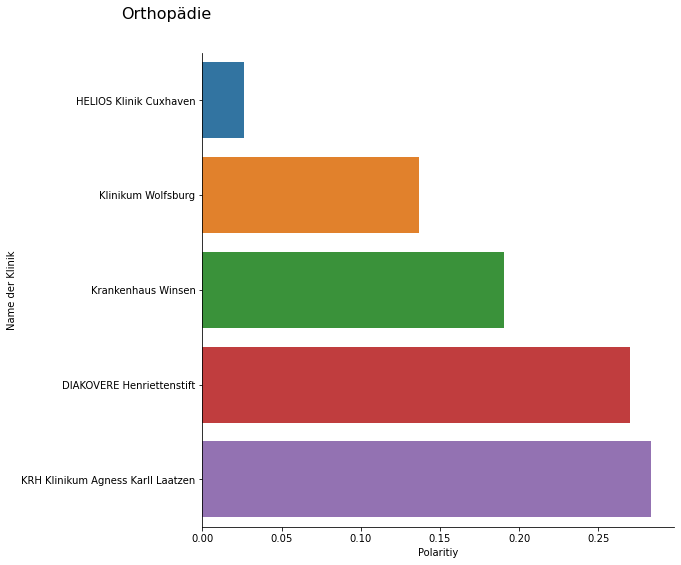

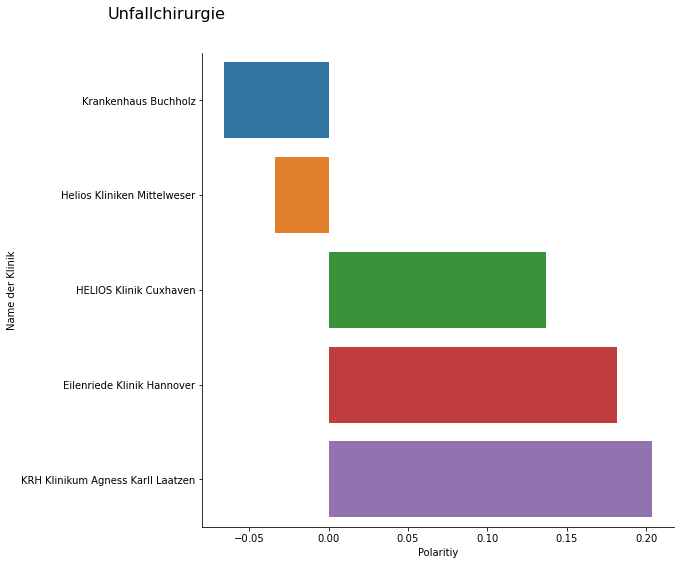

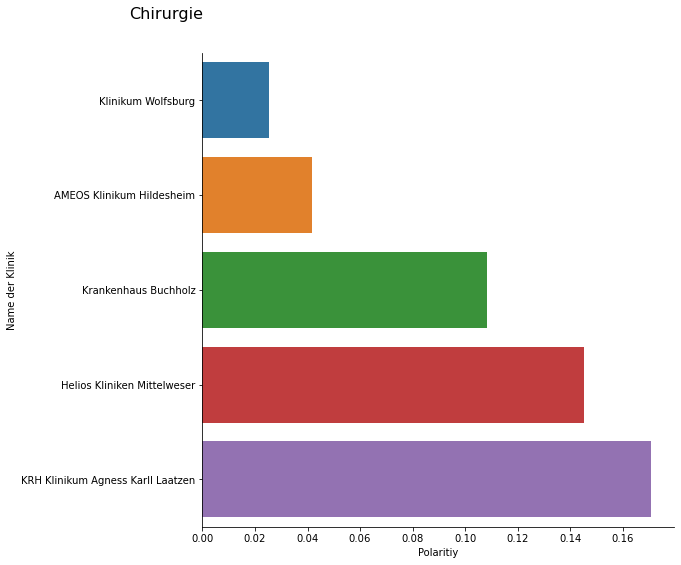

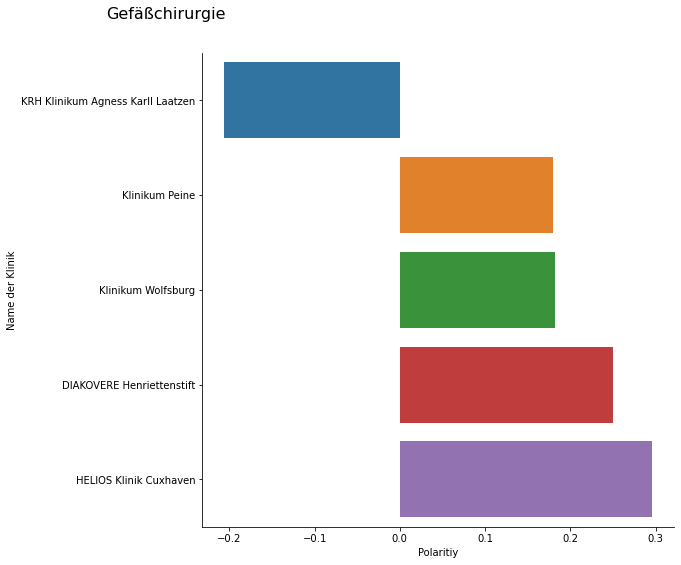

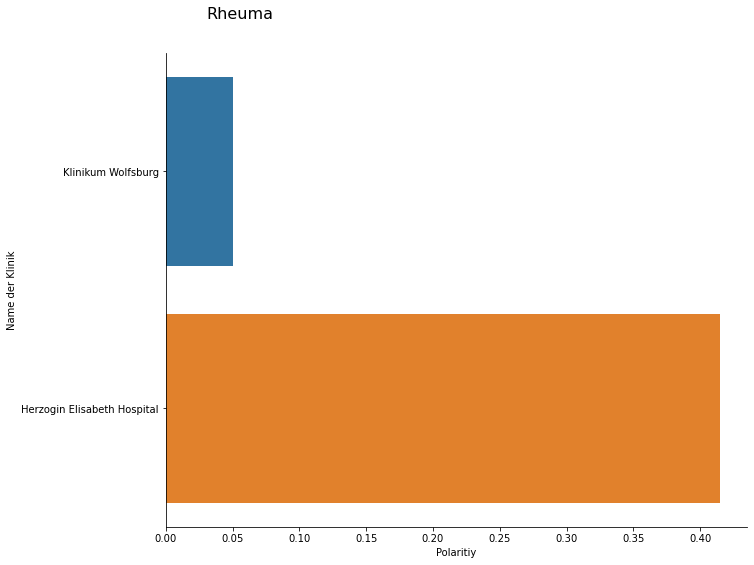

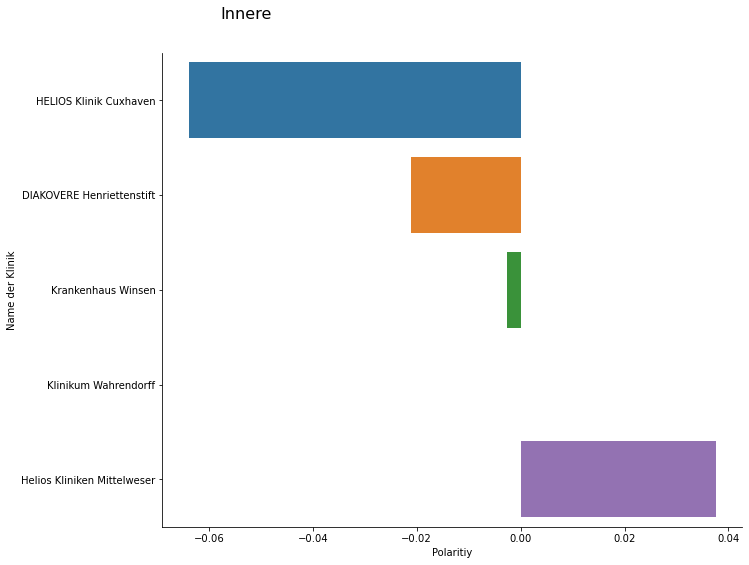

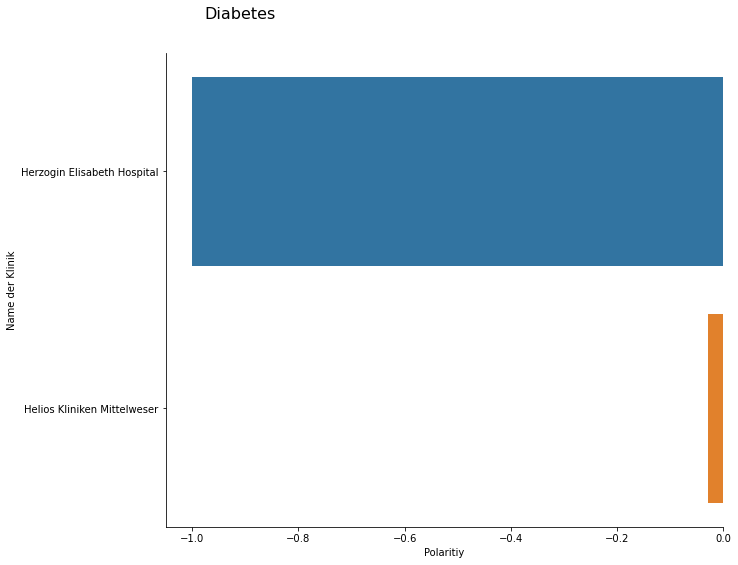

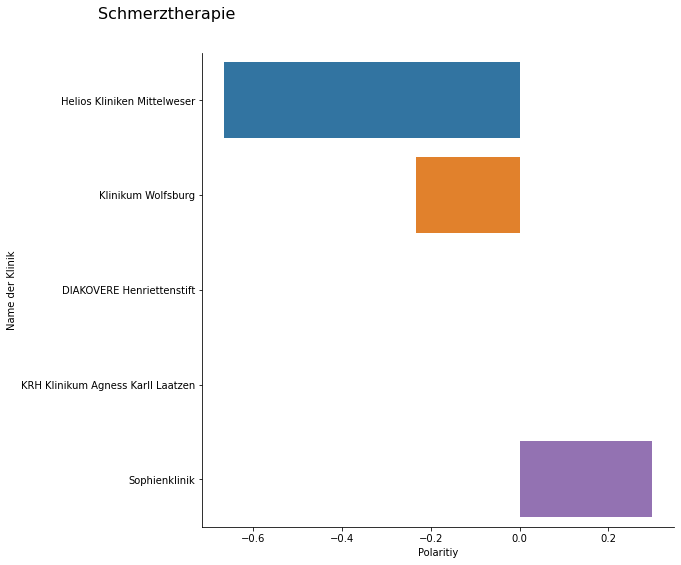

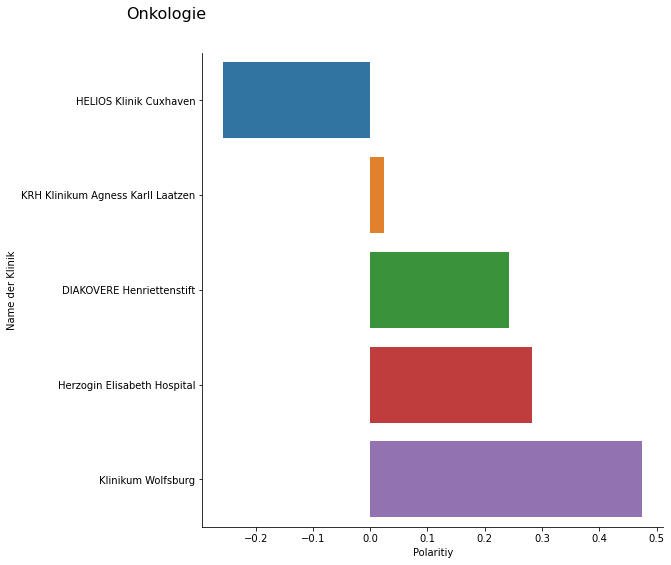

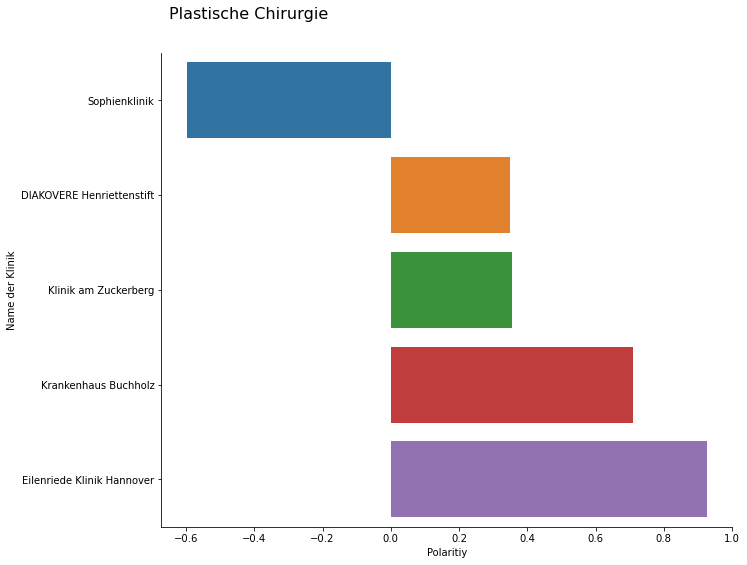

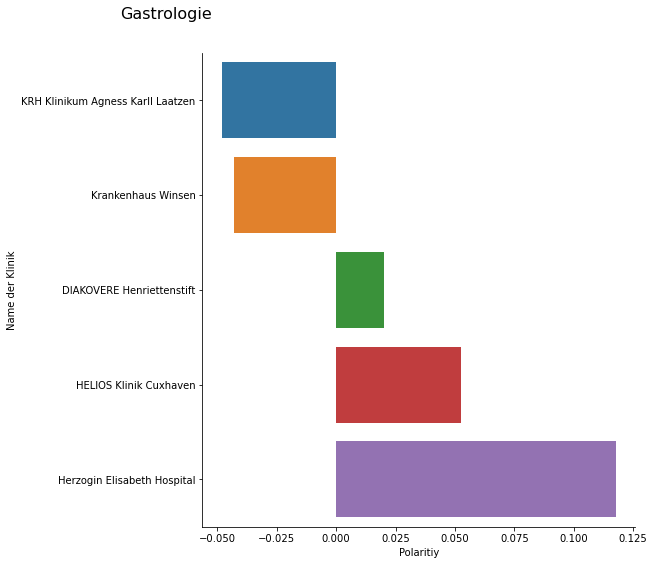

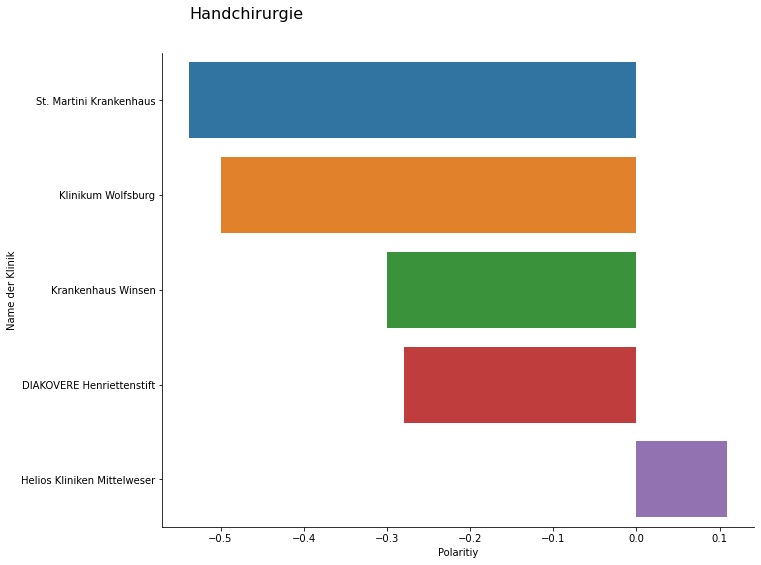

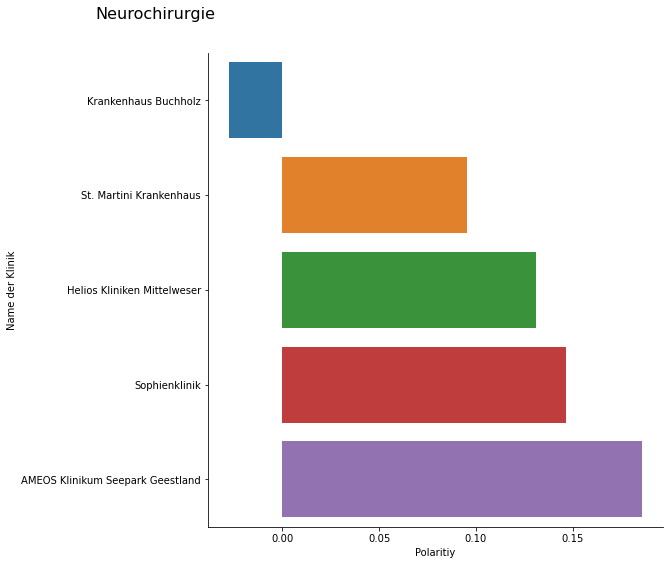

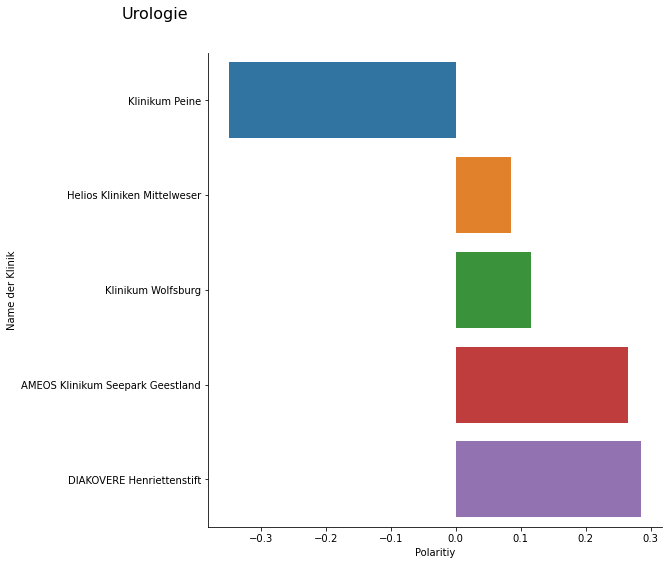

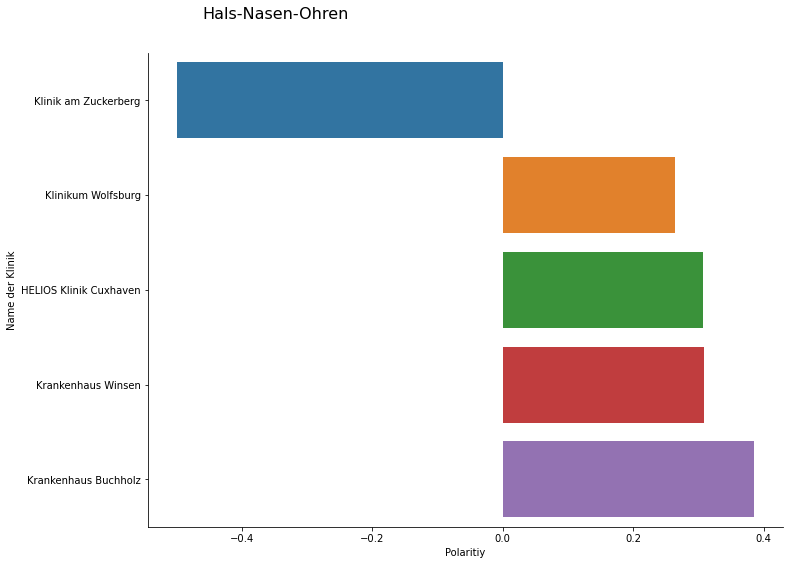

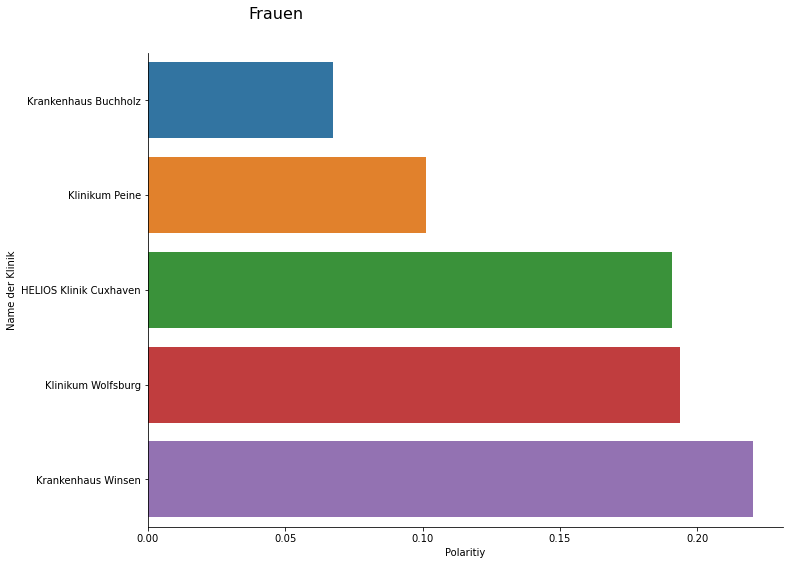

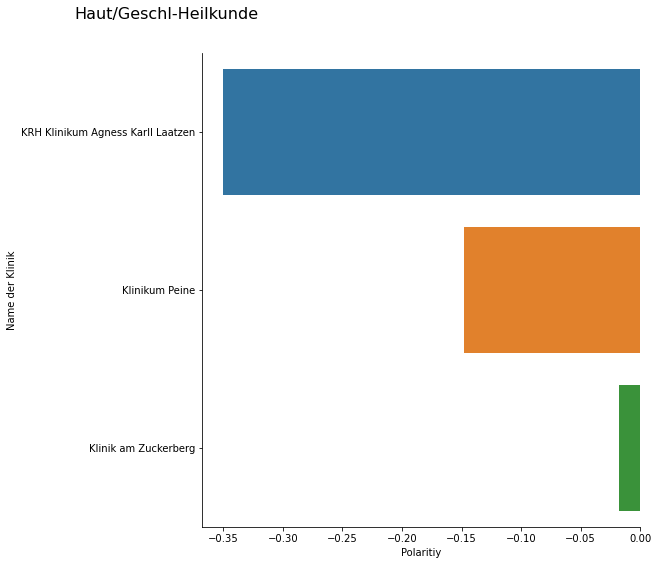

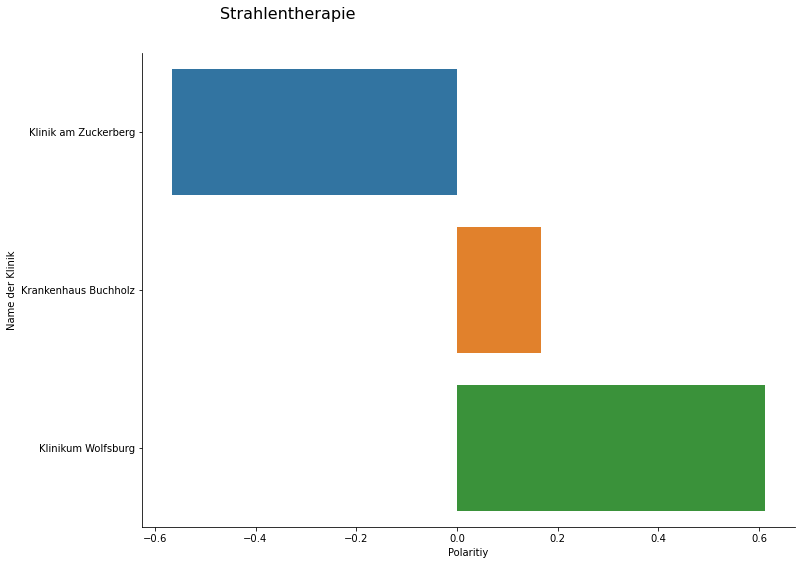

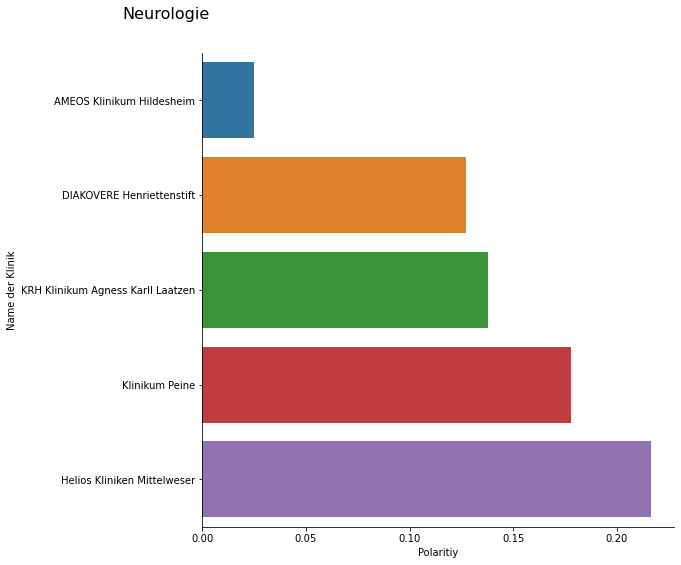

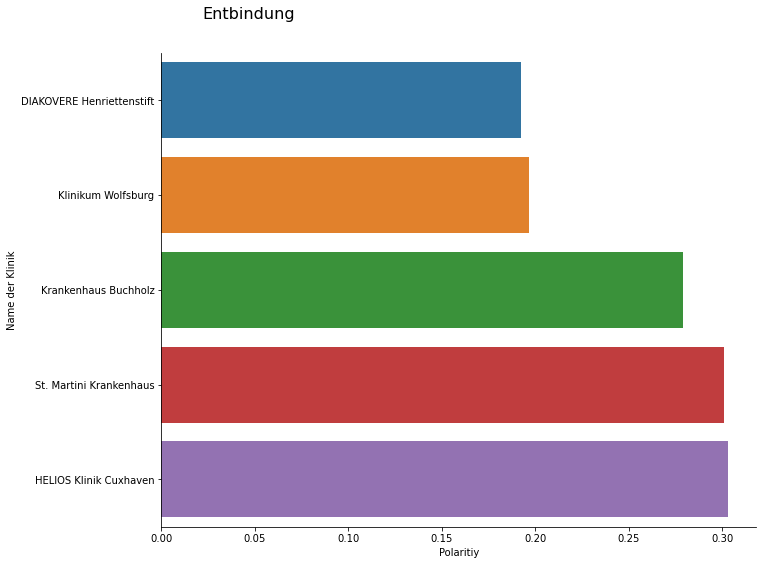

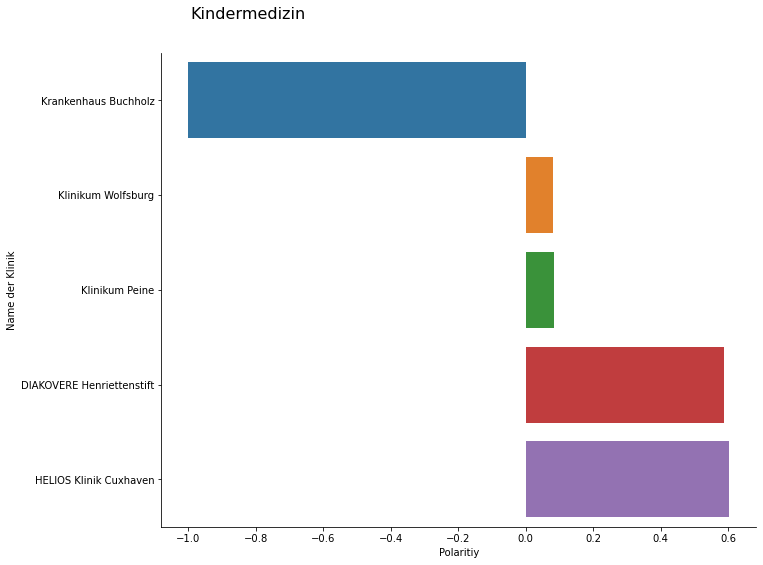

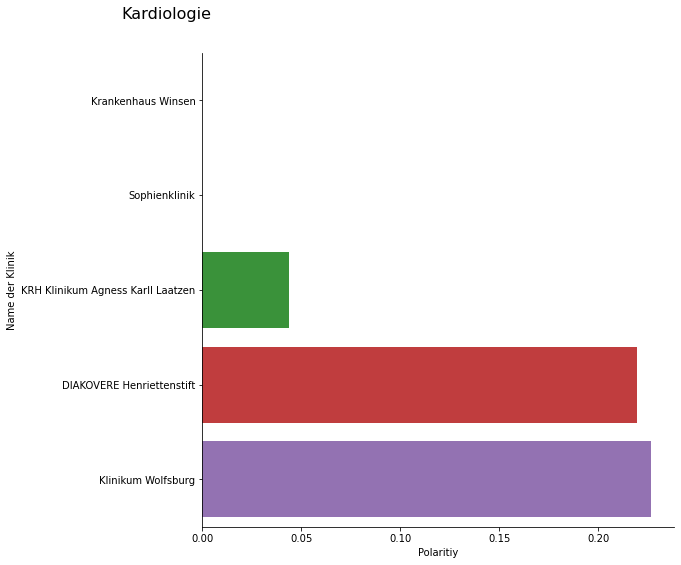

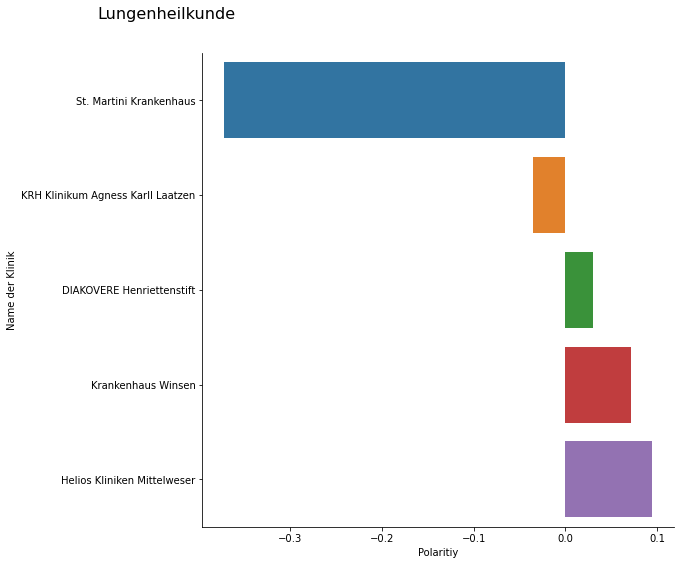

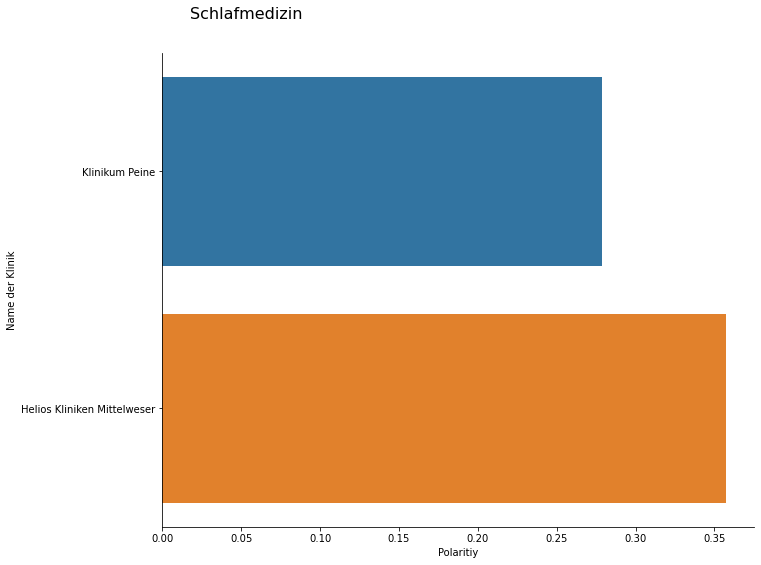

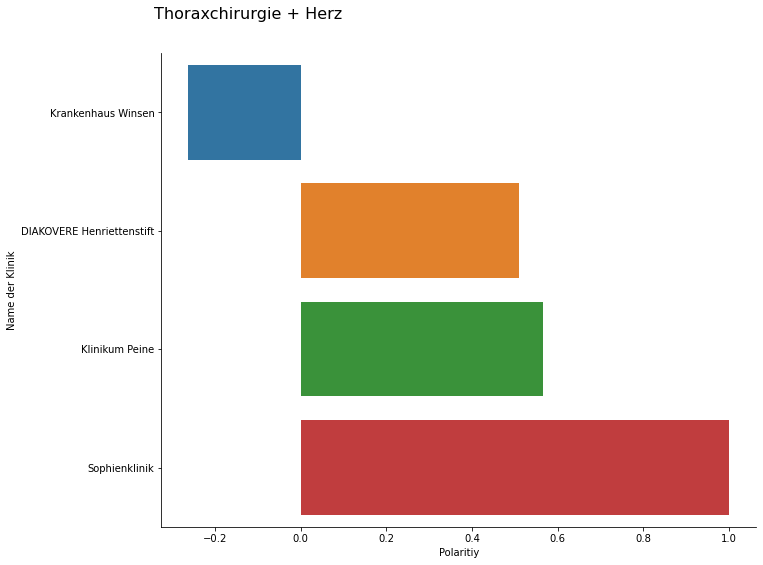

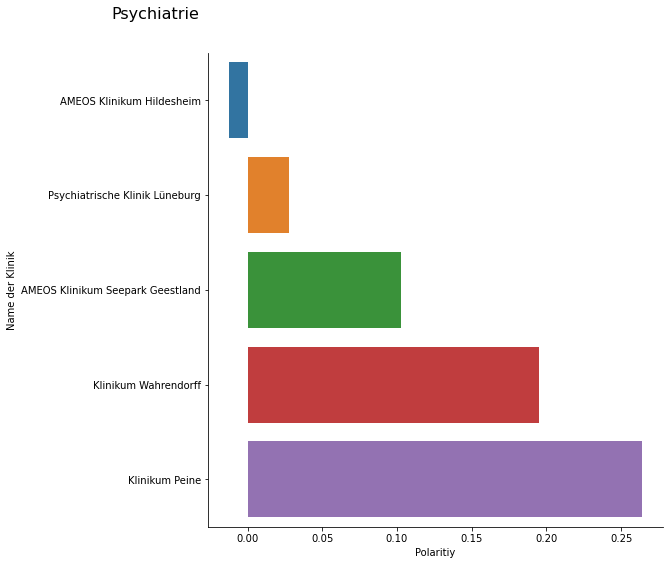

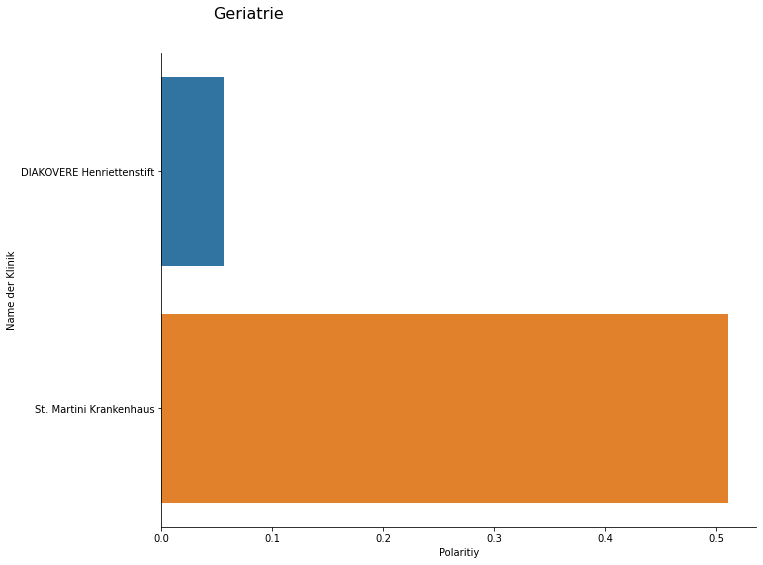

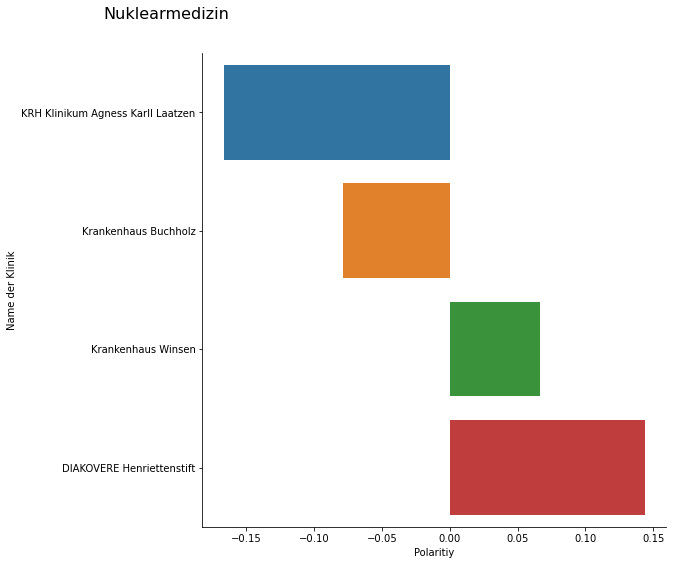

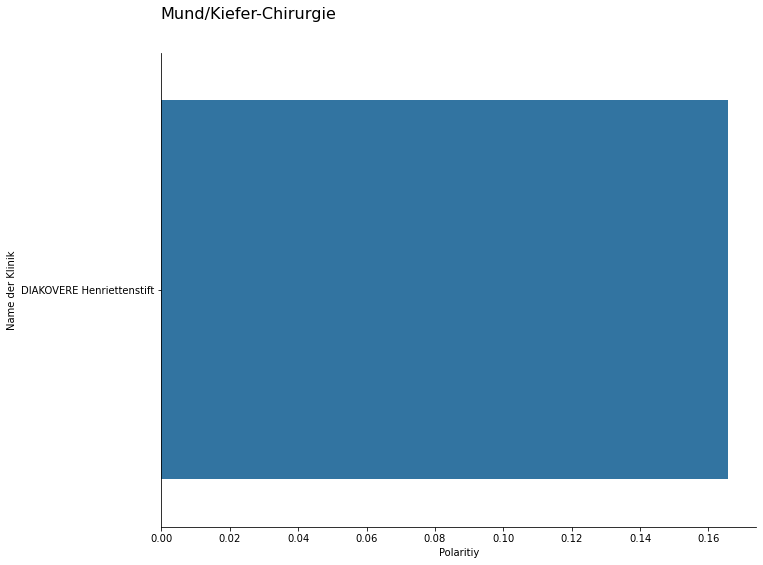

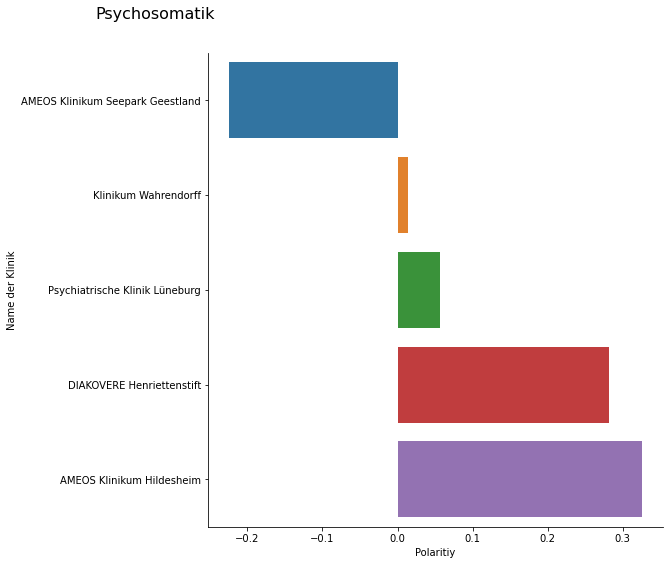

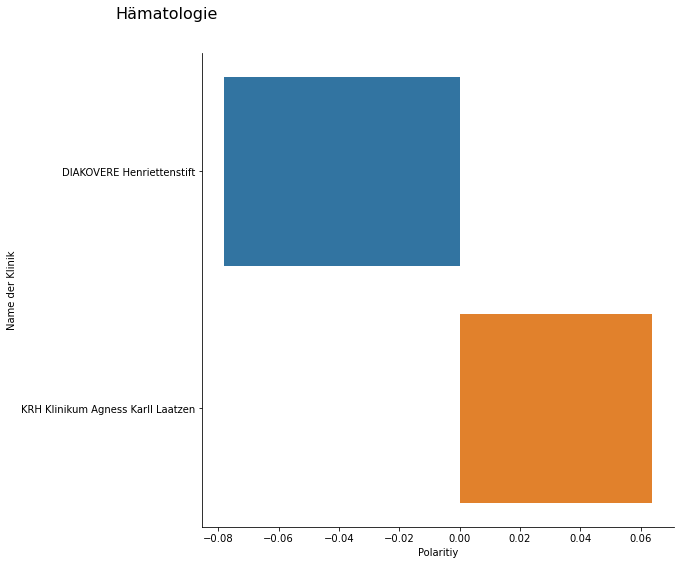

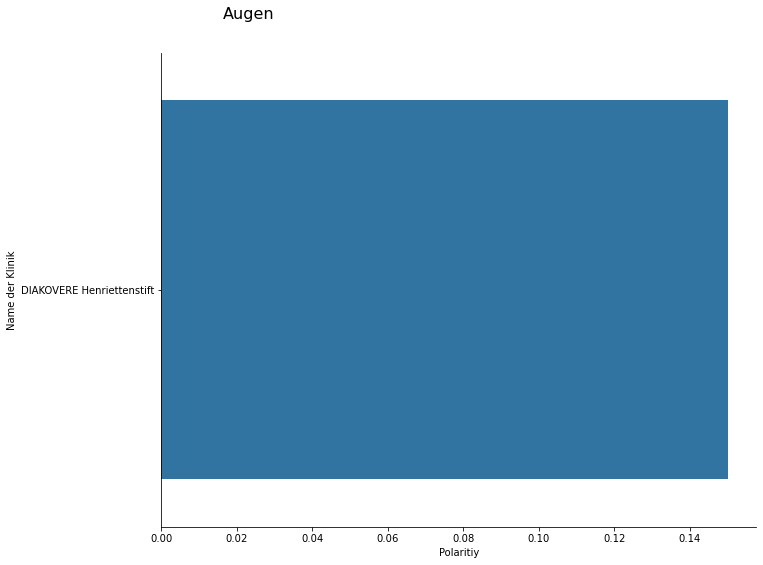

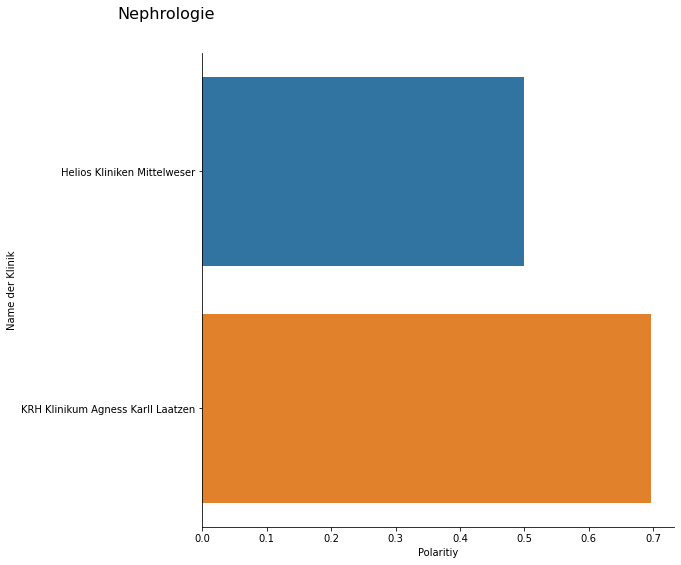

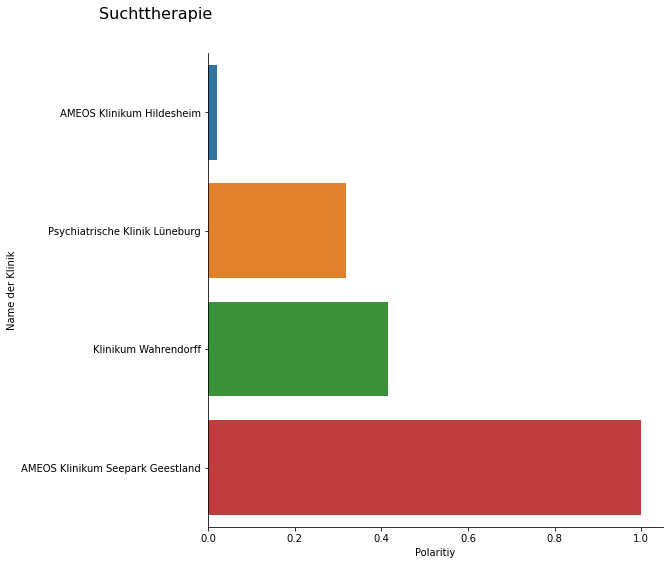

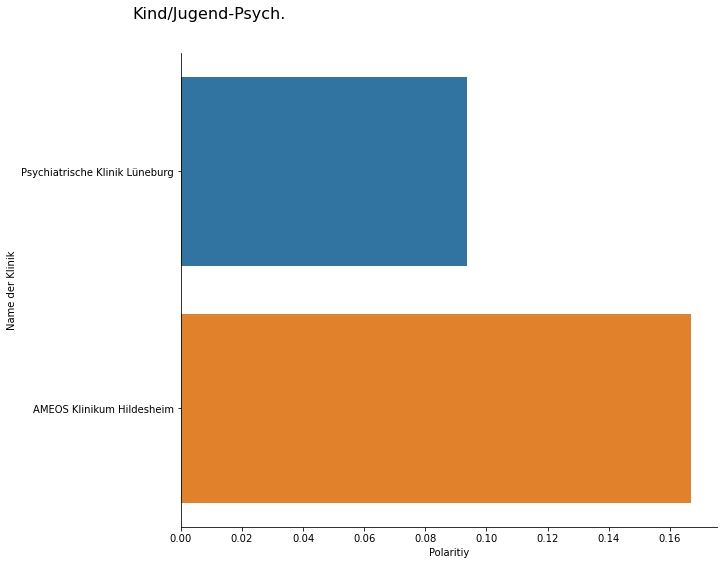

In [305]:
i=0
for fach in df["Fachbereich"].unique():
    top_kliniks=fach_pol_gr_df[fach_pol_gr_df["Fachbereich"]==fach].sort_values(by=['Polaritiy'],ascending=True).head()
    g=sns.catplot(x="Polaritiy",y="Name der Klinik",data=top_kliniks ,kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(fach, fontsize=16)
    name="fach photos/klinik fachbereich_"+str(i)+".png"
    i=i+1
    g.fig.savefig(name)